In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
import readligo as rl

import h5py

In [2]:
input_dir = "/Volumes/Research/GWNMMAD_data/source/L1/"
L_file_list = ["L-L1_GWOSC_O2_4KHZ_R1-1187270656-4096","L-L1_GWOSC_O2_4KHZ_R1-1187274752-4096","L-L1_GWOSC_O2_4KHZ_R1-1187278848-4096","L-L1_GWOSC_O2_4KHZ_R1-1187282944-4096","L-L1_GWOSC_O2_4KHZ_R1-1187287040-4096","L-L1_GWOSC_O2_4KHZ_R1-1187291136-4096"]

output_dir = "E://GWNMMAD_data/Train_Data/LIGO_noise_data_downsampled_whitened_bandpassed.npy"


In [3]:
input_file_list = []
for i in range(len(L_file_list)):
    input_file_list.append(input_dir + L_file_list[i] + ".hdf5")

input_file_list

['/Volumes/Research/GWNMMAD_data/source/L1/L-L1_GWOSC_O2_4KHZ_R1-1187270656-4096.hdf5',
 '/Volumes/Research/GWNMMAD_data/source/L1/L-L1_GWOSC_O2_4KHZ_R1-1187274752-4096.hdf5',
 '/Volumes/Research/GWNMMAD_data/source/L1/L-L1_GWOSC_O2_4KHZ_R1-1187278848-4096.hdf5',
 '/Volumes/Research/GWNMMAD_data/source/L1/L-L1_GWOSC_O2_4KHZ_R1-1187282944-4096.hdf5',
 '/Volumes/Research/GWNMMAD_data/source/L1/L-L1_GWOSC_O2_4KHZ_R1-1187287040-4096.hdf5',
 '/Volumes/Research/GWNMMAD_data/source/L1/L-L1_GWOSC_O2_4KHZ_R1-1187291136-4096.hdf5']

In [4]:
LIGOL_pure_data = TimeSeries.read(input_file_list, format="hdf5.gwosc")

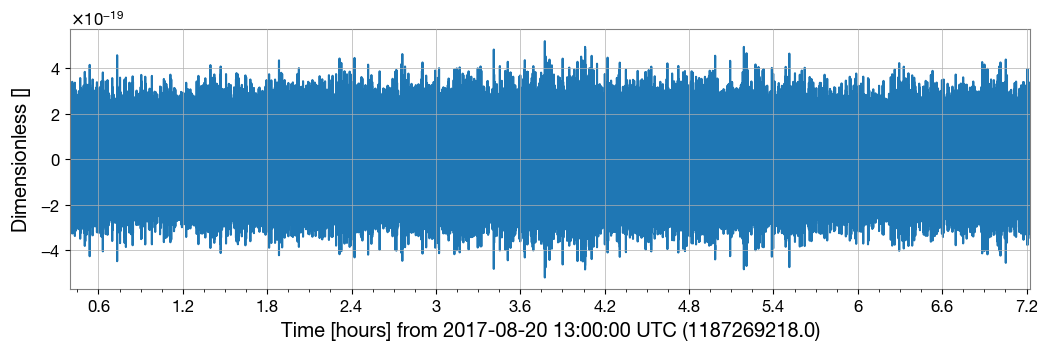

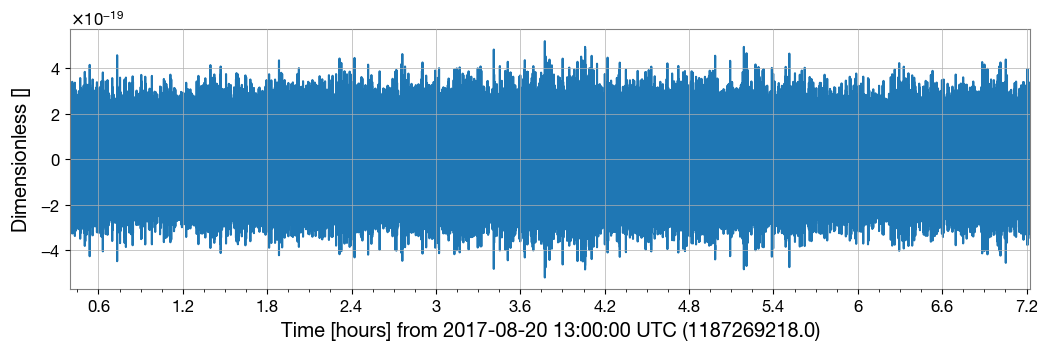

In [121]:
LIGOL_pure_data.plot()

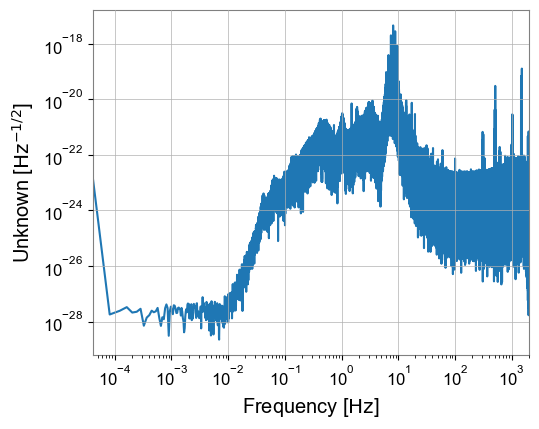

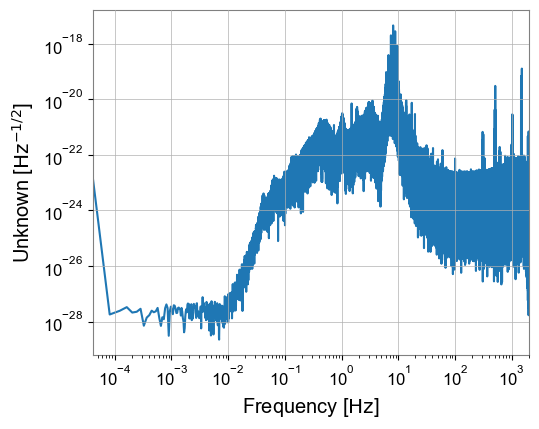

In [11]:
LIGOL_pure_data.asd().plot()

In [5]:
LIGOL_pure_data_bandpassed_whitened = LIGOL_pure_data.whiten(highpass = 30)

In [6]:
LIGOL_pure_data_bandpassed = LIGOL_pure_data.bandpass(30,1000)

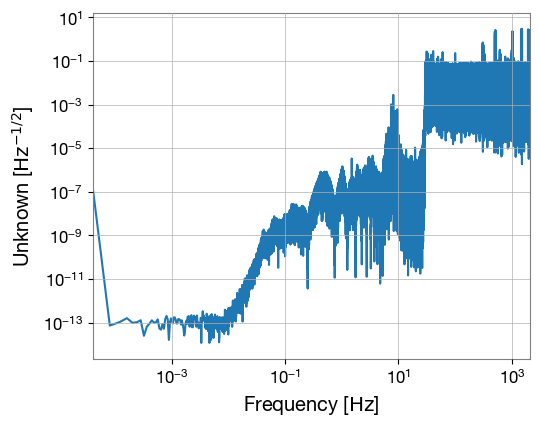

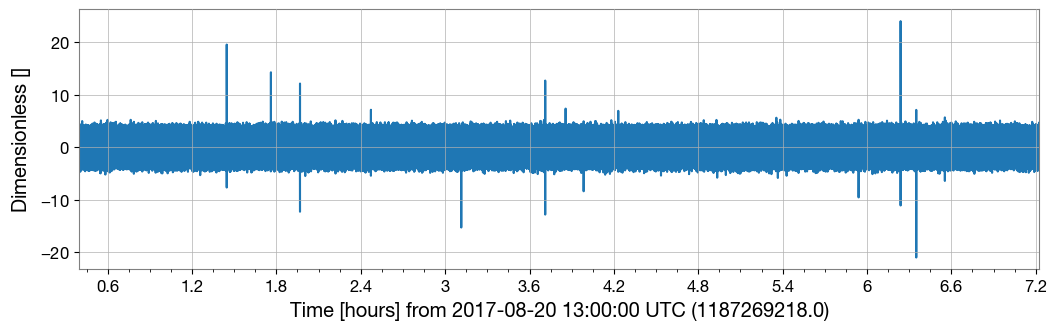

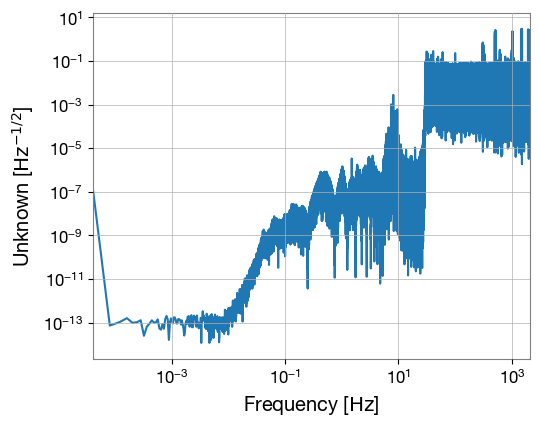

In [7]:
LIGOL_pure_data_bandpassed_whitened.plot()
LIGOL_pure_data_bandpassed_whitened.asd().plot()

In [6]:
LIGOL_injecting_data = LIGOL_pure_data

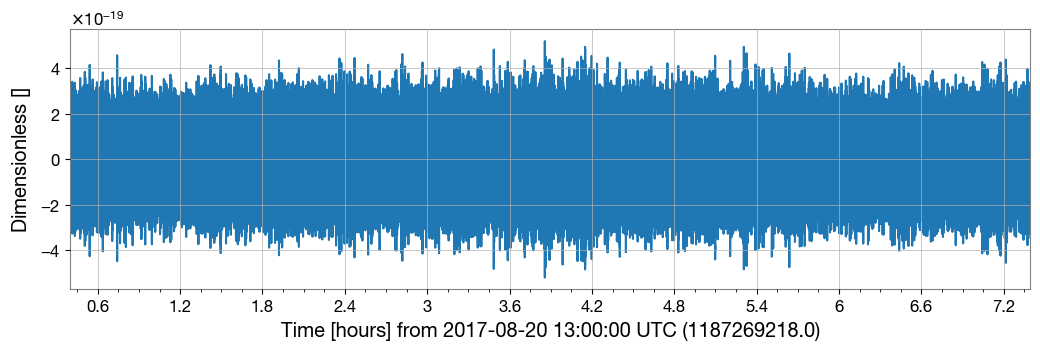

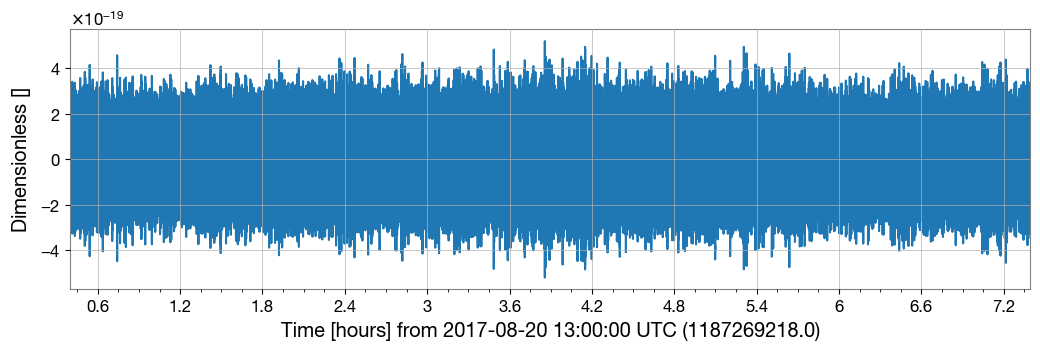

In [14]:
LIGOL_injecting_data.plot()

In [7]:
LIGOL_injecting_data.sample_rate = 4000

In [17]:
LIGOL_injecting_data_value = LIGOL_injecting_data.value

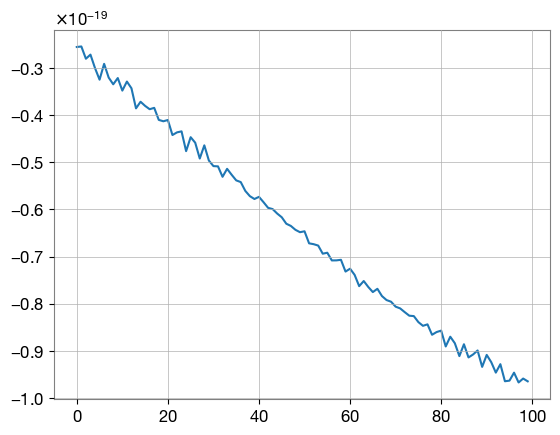

In [13]:
plt.plot(LIGOL_injecting_data_value[1000000:1000100])

In [8]:
injecting_BBH_GW_waveform = np.load("../Data_cached/4000Hz25msdatasampleBBH.npy")

In [15]:
interval = 2000

In [18]:
for i in range(len(injecting_BBH_GW_waveform)):
    for k in range(100):
        LIGOL_injecting_data_value[i * interval + k] = LIGOL_injecting_data_value[i * interval + k] + injecting_BBH_GW_waveform[i][k]

In [19]:
LIGOL_injected_data = TimeSeries(LIGOL_injecting_data_value, sample_rate=4000)

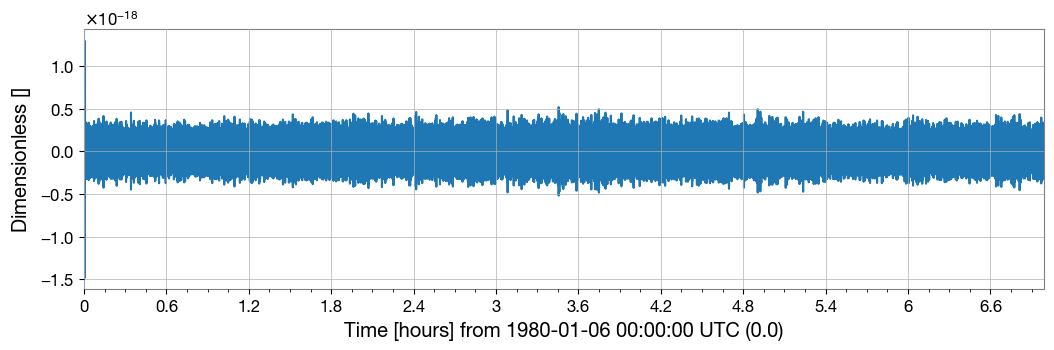

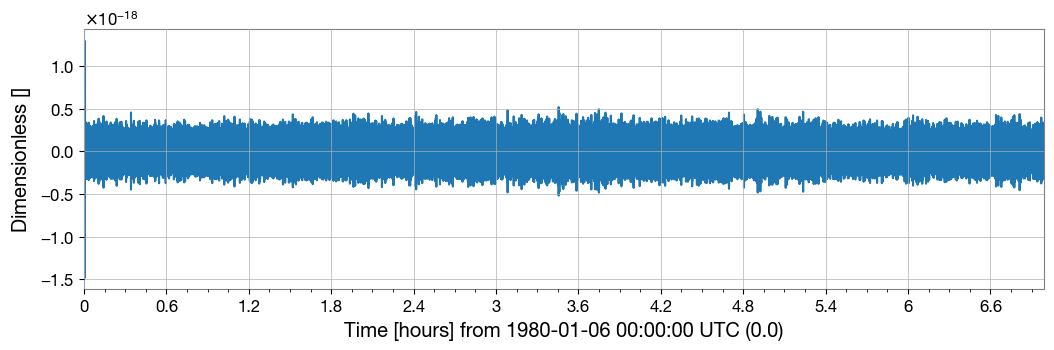

In [20]:
LIGOL_injected_data.plot()

In [21]:
LIGOL_injected_data_bandpassed_whitened = (LIGOL_injected_data.bandpass(30, 1000)).whiten(highpass = 30)

In [22]:
LIGOL_injected_data_bandpassed_whitened_value = LIGOL_injected_data_bandpassed_whitened.value

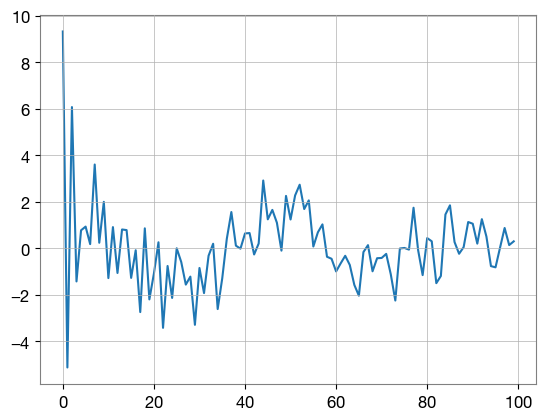

In [28]:
plt.plot(LIGOL_injected_data_bandpassed_whitened_value[2 * interval + 0:2 * interval + 100])

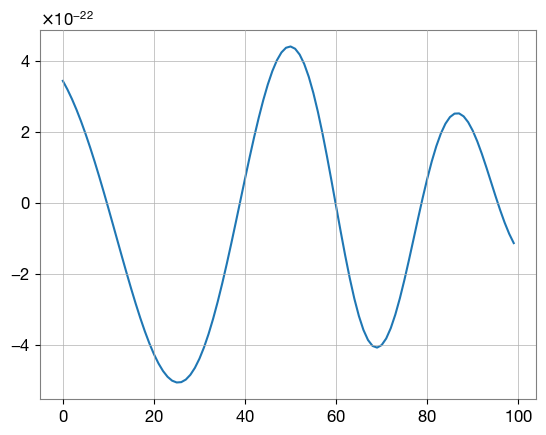

In [29]:
plt.plot(injecting_BBH_GW_waveform[2])

In [34]:
injected_BBH_signals_bandpassed_whitened = np.zeros((len(injecting_BBH_GW_waveform), 100))

In [35]:
for i in range(len(injecting_BBH_GW_waveform)):
    injected_BBH_signals_bandpassed_whitened[i] = LIGOL_injected_data_bandpassed_whitened_value[i * interval:i * interval + 100]

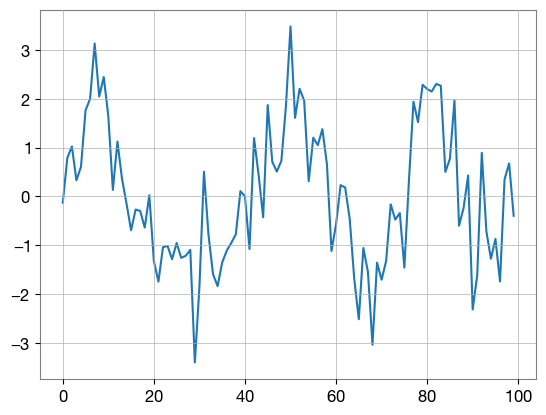

In [39]:
plt.plot(injected_BBH_signals_bandpassed_whitened[7])

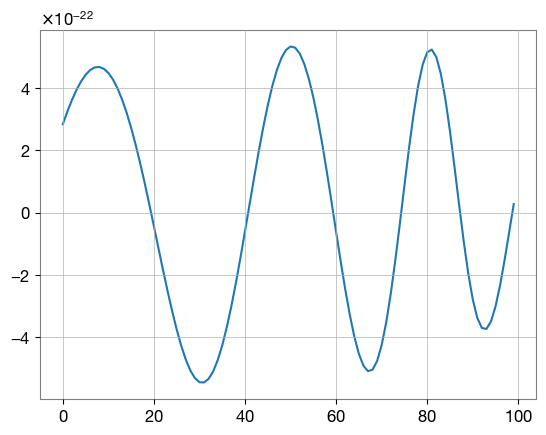

In [41]:
plt.plot(injecting_BBH_GW_waveform[7])

In [43]:
np.save("../Data_cached/4000Hz25msnoise+datasampleBBH.npy", injected_BBH_signals_bandpassed_whitened)

In [8]:
output_initial_4k_value = LIGOL_pure_data_bandpassed_whitened.value

In [9]:
a1 = (np.argwhere(output_initial_4k_value.flatten() > 6)//4096).flatten()
a2 = (np.argwhere(output_initial_4k_value.flatten() < -6)//4096).flatten()
a = np.unique(np.concatenate((a1, a2)))
output_initial_4k_value_glitches_removed = np.delete(output_initial_4k_value.reshape(-1, 4096), a, axis = 0) * 1e-22 / 3

In [78]:
plt.plot(output_initial_4k_value_glitches_removed.flatten())

In [10]:
output = output_initial_4k_value_glitches_removed.flatten()[0:100000000].reshape(-1,100)

In [11]:
np.save("../Data_cached/4000Hz25msnoisesample1e6.npy", output)

Then, let's downsample the data to 1024Hz

In [16]:
output_initial_4k_value = LIGOL_pure_data_bandpassed_whitened.value

In [17]:
output_initial_4k_value.reshape(-1, 4096)

array([[-0.02401223,  0.03528981, -0.02909724, ...,
         0.88609907, -1.71633095, -0.01045337],
       [-0.64117475,  1.70856507, -0.003501  , ...,
        -1.03003839, -0.27479781,  0.22310664],
       [-1.01691157, -1.5932843 ,  0.34412325, ...,
        -1.20675262,  1.2216636 ,  0.91244402],
       ...,
       [-1.60666721, -0.92653545, -1.418632  , ...,
         0.36160387,  0.27357455,  0.85609486],
       [-0.93046348, -0.49885182, -0.39747354, ...,
        -0.43361667, -0.45306247,  0.48815392],
       [-1.26044133, -0.62970193,  0.92452719, ...,
        -0.06022253,  0.06185974, -0.01389126]])

In [24]:
a1 = (np.argwhere(output_initial_4k_value.flatten() > 6)//4096).flatten()
a2 = (np.argwhere(output_initial_4k_value.flatten() < -6)//4096).flatten()

In [25]:
a1

array([ 3770,  3770,  3770,  3770,  3770,  3770,  3770,  3770,
        3770,  3770,  3770,  3770,  3770,  3770,  4901,  4901,
        4901,  4901,  5646,  5646,  5646,  5646,  5646,  5646,
        5646,  5646,  5646,  5646,  5646,  5646,  5646,  5646,
        5646,  7461,  7461,  7462,  7462,  7462,  7462,  7462,
        7462, 11924, 11924, 11924, 11924, 11924, 11924, 11924,
       11924, 11924, 11924, 11924, 11924, 11924, 11924, 11924,
       12446, 12446, 12446, 13794, 21022, 21022, 21022, 21022,
       21022, 21022, 21022, 21022, 21022, 21022, 21022, 21022,
       21022, 21022, 21022, 21022, 21022, 21422, 21422, 21422,
       21422], dtype=int64)

In [26]:
a2

array([ 3770,  3770,  3770,  3770,  3770,  3770,  3770,  3770,
        3770,  5646,  5646,  5646,  5646,  5646,  5646,  5646,
        5646,  5646,  5646,  5646,  5646,  5646,  5646,  5646,
        5646,  9774,  9774, 11924, 11924, 11924, 11924, 11924,
       11924, 11924, 11924, 11924, 11924, 11924, 11924, 11924,
       11924, 11924, 11924, 11924, 12907, 12907, 12907, 12907,
       12907, 12907, 12907, 12907, 19946, 19946, 19946, 19946,
       19946, 19946, 19946, 19946, 19946, 19946, 21022, 21022,
       21022, 21022, 21022, 21022, 21022, 21022, 21022, 21022,
       21022, 21022, 21022, 21022, 21022, 21022, 21022, 21022,
       21422, 21422, 21422, 21422, 21422, 21422, 21422, 22154,
       22154], dtype=int64)

In [27]:
a = np.unique(np.concatenate((a1, a2)))

In [28]:
output_initial_4k_value_glitches_removed = np.delete(output_initial_4k_value.reshape(-1, 4096), a, axis = 0)

In [30]:
del LIGOL_pure_data, LIGOL_pure_data_bandpassed, LIGOL_pure_data_bandpassed_whitened

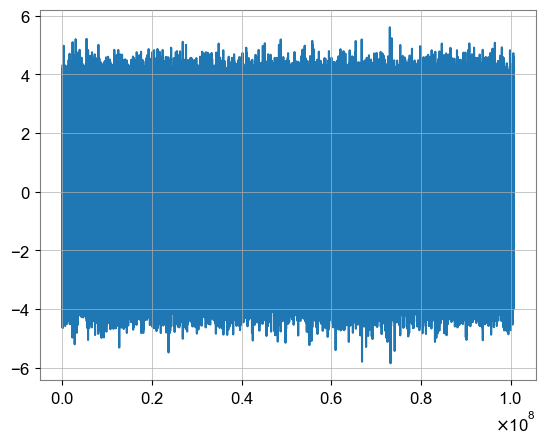

In [31]:
plt.plot(output_initial_4k_value_glitches_removed.flatten())

In [33]:
output_initial_4k_value_glitches_removed = output_initial_4k_value_glitches_removed.flatten()
average = 0
output_list = np.zeros(len(output_initial_4k_value_glitches_removed)//4)

for i in range(len(output_initial_4k_value_glitches_removed)):
    average = average + output_initial_4k_value_glitches_removed[i]
    if i%4 == 3:
        output_list[i//4] = average / 4
        average = 0
        
assert output_list[-1] != 0

print(output_list.shape)

np.save(output_dir, output_list)

(25151488,)


In [63]:
from astropy.utils.data import get_readable_fileobj
url = ("https://www.gw-openscience.org/s/events/GW150914/P150914/"
       "fig2-unfiltered-waveform-H.txt")
with get_readable_fileobj(url) as f:
    signal = TimeSeries.read(f, format='txt')
signal.t0 = 0.4

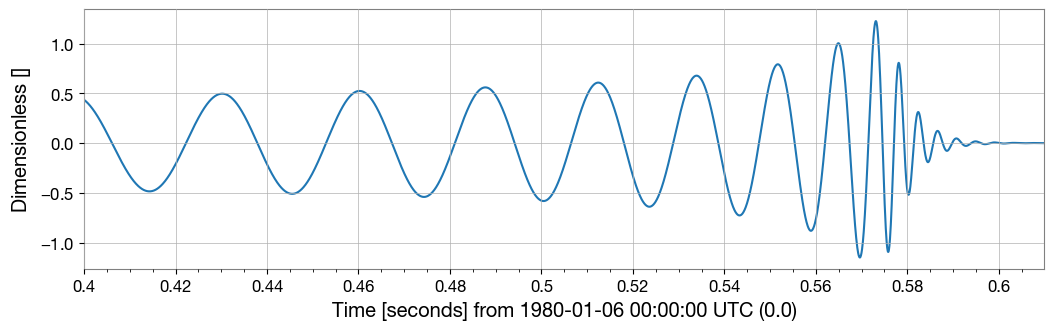

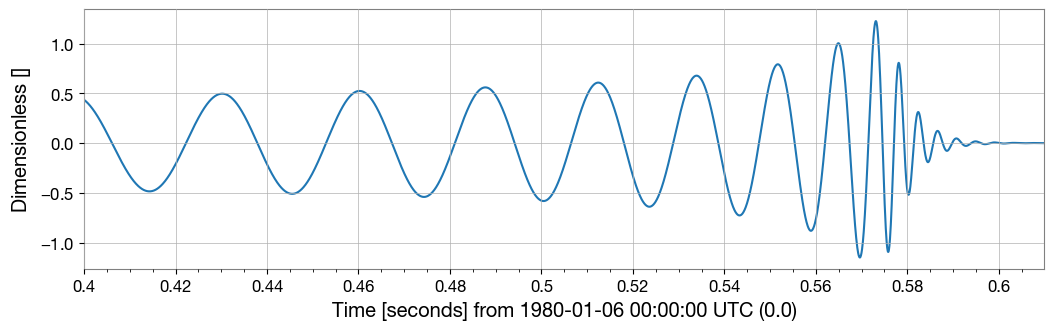

In [64]:
signal.plot()

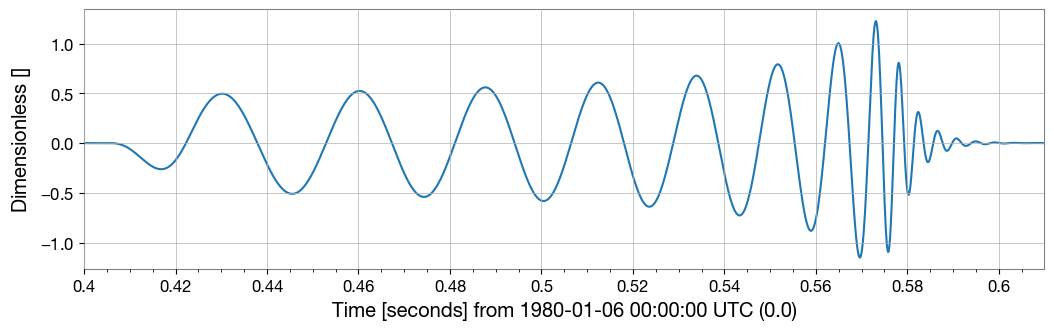

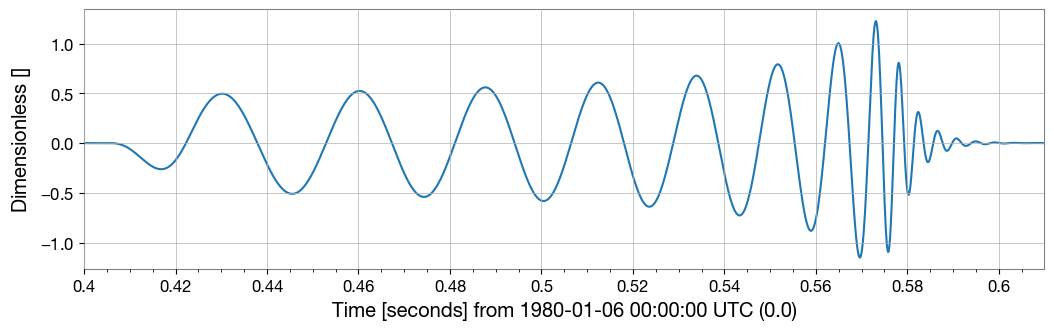

In [65]:
signal = signal.taper()
signal.plot()

In [66]:
output_initial_4k_signal = signal.value.flatten()
average = 0
output_list = np.zeros(len(output_initial_4k_signal)//4)

for i in range(len(output_initial_4k_signal)):
    average = average + output_initial_4k_signal[i]
    if i%4 == 3:
        output_list[i//4] = average / 4
        average = 0
        
assert output_list[-1] != 0

print(output_list.shape)


(860,)


In [12]:
output_list = np.concatenate((np.zeros(int(0.4 * 1024)), output_list, np.zeros(1024-int(0.4 * 1024) - len(output_list))))

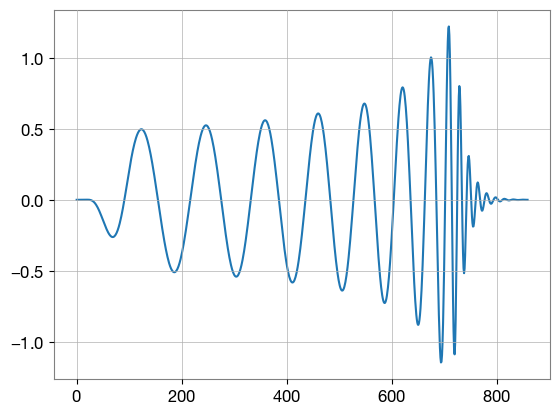

In [67]:
plt.plot(output_list)

In [68]:
output_list = output_list[0:800].reshape(8, 100)

In [69]:
np.save("../Data_cached/4096Hz25msentiresignalBBH.npy", output_list)

In [45]:
import bilby

In [47]:
num_of_samples = 7000
output_datasample = np.zeros((num_of_samples, 100))

m1_list = np.random.uniform(5,100,num_of_samples)
m2_list = np.random.uniform(5,100,num_of_samples)
a1_list = np.random.uniform(0,1,num_of_samples)
a2_list = np.random.uniform(0,1,num_of_samples)
tilt_1_list = np.random.uniform(0,np.pi,num_of_samples)
tilt_2_list = np.random.uniform(0,np.pi,num_of_samples)
phase_list = np.random.uniform(0,2*np.pi,num_of_samples)
RA_list = np.random.uniform(0,2 * np.pi,num_of_samples)
Dec_list = np.random.uniform(-np.pi/2,np.pi/2,num_of_samples)

for i in range(num_of_samples):

    injection_parameters = dict(
        mass_1=m1_list[i],
        mass_2=m2_list[i],
        a_1=a1_list[i],
        a_2=a2_list[i],
        tilt_1=tilt_1_list[i],
        tilt_2=tilt_2_list[i],
        phi_12=1.7,
        phi_jl=0.3,
        luminosity_distance=2000.0,
        theta_jn=0.4,
        psi=2.659,
        phase=phase_list[i],
        geocent_time=1126259642.413,
        ra=RA_list[i],
        dec=Dec_list[i],
    )

    # Fixed arguments passed into the source model
    waveform_arguments = dict(
        waveform_approximant="IMRPhenomXPHM",
        reference_frequency=50.0,
        minimum_frequency=20.0,
    )

    # Create the waveform_generator using a LAL BinaryBlackHole source function
    # the generator will convert all the parameters
    waveform_generator = bilby.gw.WaveformGenerator(
        duration=12,
        sampling_frequency=4000,
        frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
        parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments=waveform_arguments,
    )

    H1 = bilby.gw.detector.get_empty_interferometer('H1')
    H1.set_strain_data_from_zero_noise(sampling_frequency=4000, duration = 100, start_time=injection_parameters["geocent_time"] - 2)
    
    H1.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)
    GWform_array = H1.time_domain_strain
    
    peak_position = np.argmax(GWform_array)
    output_datasample[i] = GWform_array[peak_position - 50:peak_position + 50]
    

20:13 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


ValueError: operands could not be broadcast together with shapes (24001,) (200001,) 

In [48]:
num_of_samples = 7000
output_datasample = np.zeros((num_of_samples, 100))

m1_list = np.random.uniform(5,100,num_of_samples)
m2_list = np.random.uniform(5,100,num_of_samples)
a1_list = np.random.uniform(0,1,num_of_samples)
a2_list = np.random.uniform(0,1,num_of_samples)
tilt_1_list = np.random.uniform(0,np.pi,num_of_samples)
tilt_2_list = np.random.uniform(0,np.pi,num_of_samples)
phase_list = np.random.uniform(0,2*np.pi,num_of_samples)
RA_list = np.random.uniform(0,2 * np.pi,num_of_samples)
Dec_list = np.random.uniform(-np.pi/2,np.pi/2,num_of_samples)

for i in range(num_of_samples):

    injection_parameters = dict(
        mass_1=m1_list[i],
        mass_2=m2_list[i],
        a_1=a1_list[i],
        a_2=a2_list[i],
        tilt_1=tilt_1_list[i],
        tilt_2=tilt_2_list[i],
        phi_12=1.7,
        phi_jl=0.3,
        luminosity_distance=2000.0,
        theta_jn=0.4,
        psi=2.659,
        phase=phase_list[i],
        geocent_time=1126259642.413,
        ra=RA_list[i],
        dec=Dec_list[i],
    )

    # Fixed arguments passed into the source model
    waveform_arguments = dict(
        waveform_approximant="IMRPhenomXPHM",
        reference_frequency=50.0,
        minimum_frequency=20.0,
    )

    # Create the waveform_generator using a LAL BinaryBlackHole source function
    # the generator will convert all the parameters
    waveform_generator = bilby.gw.WaveformGenerator(
        duration=12,
        sampling_frequency=4000,
        frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
        parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments=waveform_arguments,
    )

    H1 = bilby.gw.detector.get_empty_interferometer('H1')
    H1.set_strain_data_from_zero_noise(sampling_frequency=4000, duration = 12, start_time=injection_parameters["geocent_time"] - 2)
    
    H1.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)
    GWform_array = H1.time_domain_strain
    
    peak_position = np.argmax(GWform_array)
    output_datasample[i] = GWform_array[peak_position - 50:peak_position + 50]
    

20:14 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
20:14 bilby INFO    : Injected signal in H1:
20:14 bilby INFO    :   optimal SNR = 7.21
20:14 bilby INFO    :   matched filter SNR = 7.21+0.00j
20:14 bilby INFO    :   mass_1 = 10.176772051988525
20:14 bilby INFO    :   mass_2 = 93.90949115813636
20:14 bilby INFO    :   a_1 = 0.7992586364166577
20:14 bilby INFO    :   a_2 = 0.8853240064625959
20:14 bilby INFO    :   tilt_1 = 2.1599923247982455
20:14 bilby INFO    :   tilt_2 = 0.79144049068342
20:14 bilby INFO    :   phi_12 = 1.7
20:14 bilby INFO    :   phi_jl = 0.3
20:14 bilby INFO    :   luminosity_distance = 2000.0
20:14 bilby INFO    :   theta_jn = 0.4
20:14 bilby INFO    :   psi = 2.659
20:14 bilby INFO    :   phase = 0.6894525896587894
20:14 bilby INFO    :   geocent_time = 1126259642.41

ValueError: The injected signal has a duration in-band of 20.5s, but the data for detector H1 has a duration of 12s

In [61]:
np.argwhere(output_datasample == 0)

array([], shape=(0, 2), dtype=int64)

In [60]:
output_datasample = output_datasample[0:3346]

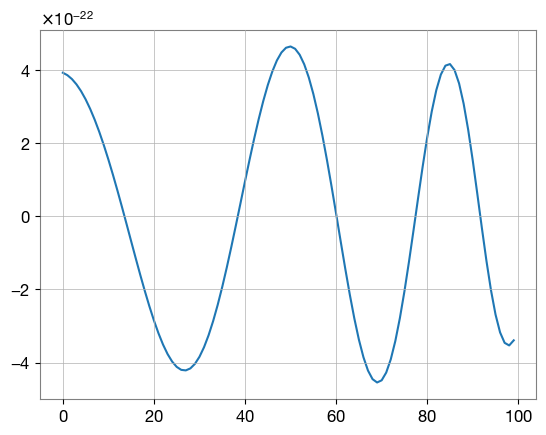

In [140]:
plt.plot(output_datasample[48])

In [62]:
np.save("../Data_cached/4000Hz25msdatasampleBBH3346.npy", output_datasample)

In [11]:
num_of_samples = 200
output_datasample = np.zeros((num_of_samples, 100))

Q_list = np.random.uniform(5,100,num_of_samples)
frequency_list = np.random.uniform(5,100,num_of_samples)
phase_list = np.random.uniform(0,1,num_of_samples)
RA_list = np.random.uniform(0,2 * np.pi,num_of_samples)
Dec_list = np.random.uniform(-np.pi/2,np.pi/2,num_of_samples)

for i in range(num_of_samples):

    injection_parameters = dict(
        Q=Q_list[i],
        frequency=frequency_list[i],
        frequency_array=np.arange(64,512),
        hress=1,
        phi_12=1.7,
        phi_jl=0.3,
        luminosity_distance=2000.0,
        theta_jn=0.4,
        psi=2.659,
        phase=phase_list[i],
        geocent_time=1126259642.413,
        ra=RA_list[i],
        dec=Dec_list[i],
    )

    signal = bilby.gw.source.sinegaussian(Q=Q_list[i], hrss = 1, frequency=frequency_list[i], frequency_array=np.arange(64,512))
    
    H1.inject_signal(data = signal)
    GWform_array = H1.time_domain_strain
    
    peak_position = np.argmax(GWform_array)
    output_datasample[i] = GWform_array[peak_position - 50:peak_position + 50]
    

TypeError: Interferometer.inject_signal() got an unexpected keyword argument 'data'

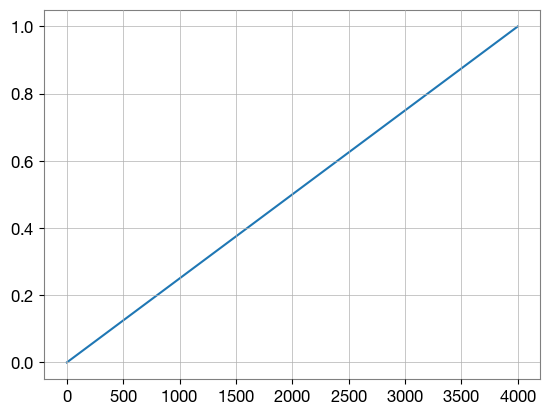

In [97]:
plt.plot(H1.time_array)

In [104]:
injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=2000.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
)

# Fixed arguments passed into the source model
waveform_arguments = dict(
    waveform_approximant="IMRPhenomXPHM",
    reference_frequency=50.0,
    minimum_frequency=20.0,
)

# Create the waveform_generator using a LAL BinaryBlackHole source function
# the generator will convert all the parameters
waveform_generator = bilby.gw.WaveformGenerator(
    duration=4,
    sampling_frequency=4000,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

H1 = bilby.gw.detector.get_empty_interferometer('H1')
H1.set_strain_data_from_zero_noise(sampling_frequency=4000, duration = 4, start_time=injection_parameters["geocent_time"] - 2)

H1.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)
GWform_array = H1.time_domain_strain

13:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
13:29 bilby INFO    : Injected signal in H1:
13:29 bilby INFO    :   optimal SNR = 12.24
13:29 bilby INFO    :   matched filter SNR = 12.24+0.00j
13:29 bilby INFO    :   mass_1 = 36.0
13:29 bilby INFO    :   mass_2 = 29.0
13:29 bilby INFO    :   a_1 = 0.4
13:29 bilby INFO    :   a_2 = 0.3
13:29 bilby INFO    :   tilt_1 = 0.5
13:29 bilby INFO    :   tilt_2 = 1.0
13:29 bilby INFO    :   phi_12 = 1.7
13:29 bilby INFO    :   phi_jl = 0.3
13:29 bilby INFO    :   luminosity_distance = 2000.0
13:29 bilby INFO    :   theta_jn = 0.4
13:29 bilby INFO    :   psi = 2.659
13:29 bilby INFO    :   phase = 1.3
13:29 bilby INFO    :   geocent_time = 1126259642.413
13:29 bilby INFO    :   ra = 1.375
13:29 bilby INFO    :   dec = -1.2108


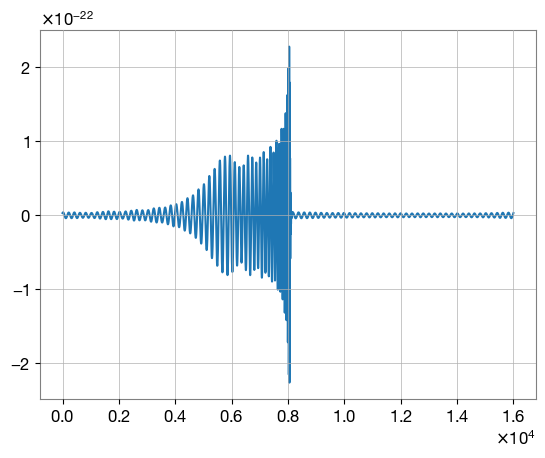

In [105]:
plt.plot(GWform_array)

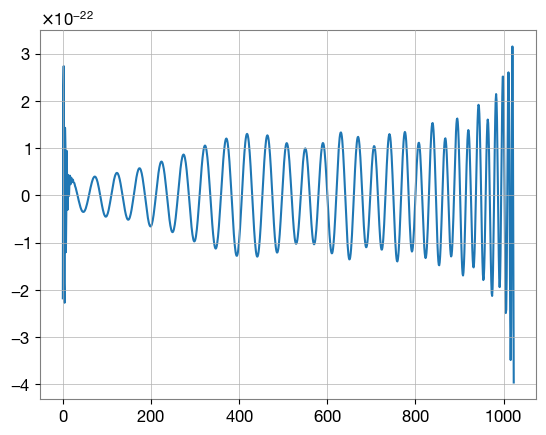

In [53]:
plt.plot(signal['plus'])

In [73]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration=1,
    sampling_frequency=4000,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)
H1.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

12:43 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
12:43 bilby WARNING : Injecting signal outside segment, start_time=0, merger time=1126259642.413.
12:43 bilby INFO    : Injected signal in H1:
12:43 bilby INFO    :   optimal SNR = 12.24
12:43 bilby INFO    :   matched filter SNR = 12.24+0.00j
12:43 bilby INFO    :   mass_1 = 36.0
12:43 bilby INFO    :   mass_2 = 29.0
12:43 bilby INFO    :   a_1 = 0.4
12:43 bilby INFO    :   a_2 = 0.3
12:43 bilby INFO    :   tilt_1 = 0.5
12:43 bilby INFO    :   tilt_2 = 1.0
12:43 bilby INFO    :   phi_12 = 1.7
12:43 bilby INFO    :   phi_jl = 0.3
12:43 bilby INFO    :   luminosity_distance = 2000.0
12:43 bilby INFO    :   theta_jn = 0.4
12:43 bilby INFO    :   psi = 2.659
12:43 bilby INFO    :   phase = 1.3
12:43 bilby INFO    :   geocent_time = 1126259642.41

{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
 'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}

In [74]:
H1.plot_time_domain_data()

In [78]:
H1.time_array

array([0.0000e+00, 2.5000e-04, 5.0000e-04, ..., 9.9925e-01,
       9.9950e-01, 9.9975e-01])

In [ ]:
num_of_samples = 1000
for i in range(num_of_samples):
    

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform

# 设置模拟参数
sampling_frequency = 4096
duration = 4
mass_1 = 30
mass_2 = 20
distance = 500
inclination = 0.4
coa_phase = 1.3
polarization = 2.659

# 生成波形
hp, hc = get_td_waveform(approximant='IMRPhenomPv2', mass1=mass_1, mass2=mass_2,
                          distance=distance, inclination=inclination,
                          coa_phase=coa_phase, polarization=polarization,
                          delta_t=1.0/sampling_frequency, f_lower=20)

# 调整波形的时间和振幅
hp = hp.cyclic_time_shift(hp.start_time)
hp = hp / np.max(np.abs(hp))

# 绘制波形
plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.show()

TypeError: pycbc.types.array_cpu.max() takes no keyword arguments

In [3]:
noise_data = np.load("../Data_cached/4000Hz25msnoisesample.npy")

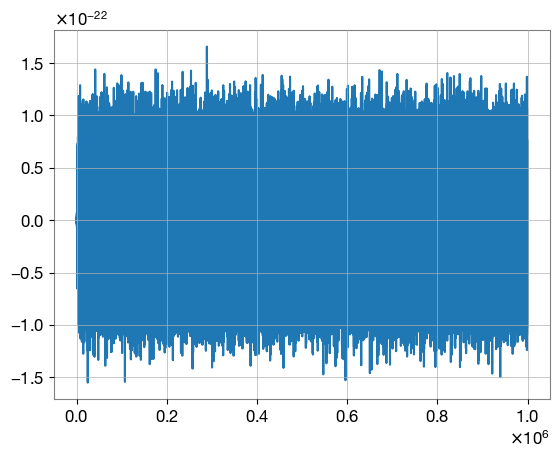

In [6]:
plt.plot(noise_data.flatten())

In [12]:
signal_BBH = np.load("../Data_cached/4000Hz25msdatasampleBBH.npy")

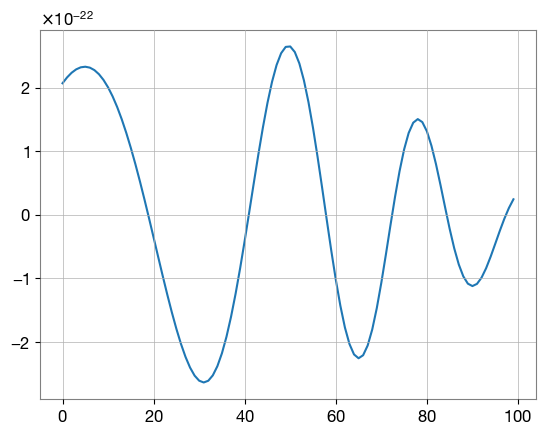

In [13]:
plt.plot(signal_BBH[0])

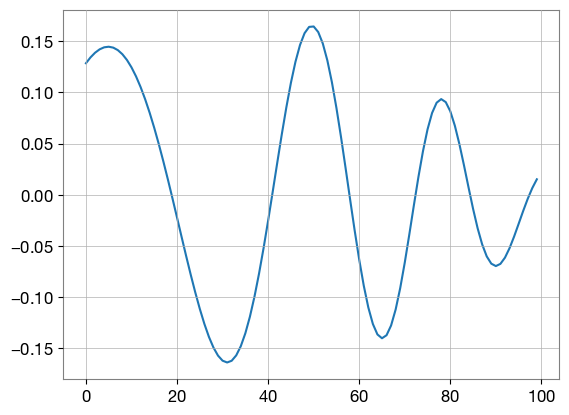

In [17]:
plt.plot(signal_BBH[0] / np.linalg.norm(signal_BBH[0]))

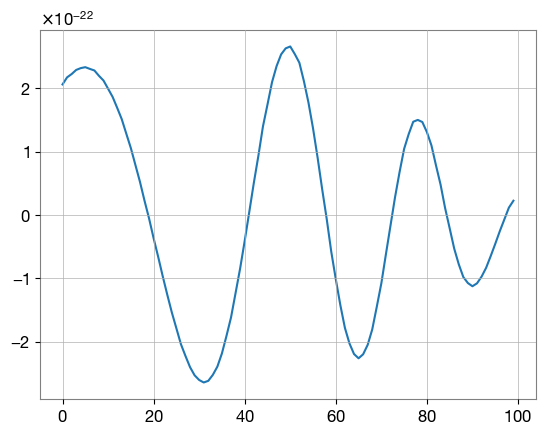

In [14]:
plt.plot(signal_BBH[0] + noise_data[0])

### Search for proper BBH data

In [2]:
file_path_bbh_L1_p1 = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_inj_new/bbh_5-12.hdf5'

In [3]:
file_bbh_L1_p1 = h5py.File(file_path_bbh_L1_p1, 'r')

In [31]:
file_bbh_L1_p1['inject_parameters']['t0_L1'].min()

1238362837.8897753

In [20]:
file_bbh_L1_p1['L1'].shape

(1902, 24576)

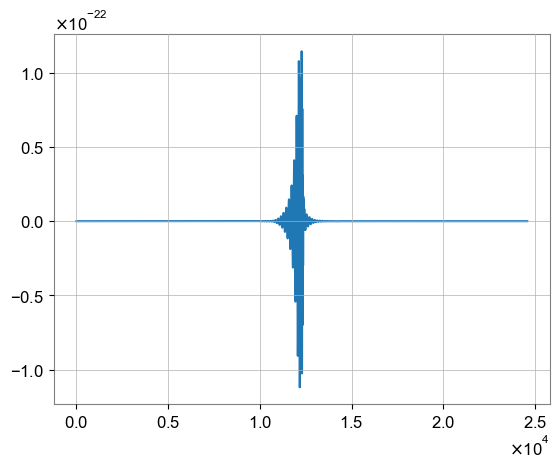

In [22]:
plt.plot(file_bbh_L1_p1['bbh_L1'][0])

In [13]:
type(np.array(file_bbh_L1_p1['inj_params'][0]))

numpy.ndarray

In [30]:
np.array(file_bbh_L1_p1['inj_params']['snr'])

array([21.23498949, 15.537444  , 59.16623019, ..., 22.35644202,
       74.5956995 , 83.49397915])

In [8]:
np.array(file_bbh_L1_p1['inj_params'])[:,-1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [31]:
file_bbh_L1_p1.keys()

<KeysViewHDF5 ['H1', 'L1', 'bbh_H1', 'bbh_L1', 'inj_params']>

In [25]:
whitened_strain_list = np.zeros((0,2,200))
snr_list = np.zeros((0,1))
starting_time_L = 1238392674
ending_time_L = 1238396770
starting_time_H = 1238588525
ending_time_H = 1238592621

for i in range(24):
    file_path = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_inj_new/bbh_dataset_p'+str(i+1)+'.hdf5'
    file = h5py.File(file_path, 'r')
    whitened_strain_L = file['L1']
    whitened_strain_H = file['H1']
    print(whitened_strain_L.shape)
    
    pure_strain_L = file['bbh_L1']
    pure_strain_H = file['bbh_H1']
    
    snr = file['inj_params']['snr']
    inject_time_L = file['inj_params']['t0_L1']
    inject_time_H = file['inj_params']['t0_H1']
    
    args = np.argwhere(np.logical_and(((inject_time_L > starting_time_L)&(inject_time_L < ending_time_L)),((inject_time_H > starting_time_H)&(inject_time_H < ending_time_H)))).flatten()

    for arg in args:
        merger_time_L = np.argmax(pure_strain_L[arg])
        merger_time_H = np.argmax(pure_strain_H[arg])
        
        mean_merger_time = int((merger_time_L + merger_time_H)/2)
        
        # print(arg)
        # print(merger_time_L)
        # print(merger_time_H)
        # print(mean_merger_time)
        # print(whitened_strain_L[arg])
        # print(whitened_strain_H[arg][mean_merger_time-100:mean_merger_time+100])
        
        whitened_strain = np.hstack((whitened_strain_L[arg][mean_merger_time-100:mean_merger_time+100],whitened_strain_H[arg][mean_merger_time-100:mean_merger_time+100])).reshape(2,200)
    
        whitened_strain_list = np.append(whitened_strain_list, whitened_strain)
        snr_list = np.append(snr_list, snr[arg])

(4505, 24576)


KeyError: "Unable to synchronously open object (object 'inject_params' doesn't exist)"

In [28]:
snr_range = ["5-12","12-24","24-48","48-96"]

for snr_limit in snr_range:
    whitened_strain_list = np.zeros((0,2,200))
    snr_list = np.zeros((0,1))
    file_path = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_inj_new/bbh_'+snr_limit+'.hdf5'
    file = h5py.File(file_path, 'r')
    whitened_strain_L = file['L1']
    whitened_strain_H = file['H1']
    print(whitened_strain_L.shape)
    
    pure_strain_L = file['bbh_L1']
    pure_strain_H = file['bbh_H1']
    
    snr = file['inject_parameters']['network_snr']
    inject_time_L = file['inject_parameters']['t0_L1']
    inject_time_H = file['inject_parameters']['t0_H1']
    
    args = range(len(whitened_strain_L))

    for arg in args:
        merger_time_L = np.argmax(pure_strain_L[arg])
        merger_time_H = np.argmax(pure_strain_H[arg])
        
        mean_merger_time = int((merger_time_L + merger_time_H)/2)
        
        # print(arg)
        # print(merger_time_L)
        # print(merger_time_H)
        # print(mean_merger_time)
        # print(whitened_strain_L[arg])
        # print(whitened_strain_H[arg][mean_merger_time-100:mean_merger_time+100])
        
        whitened_strain = np.hstack((whitened_strain_L[arg][mean_merger_time-100:mean_merger_time+100],whitened_strain_H[arg][mean_merger_time-100:mean_merger_time+100])).reshape(2,200)
    
        whitened_strain_list = np.append(whitened_strain_list, whitened_strain)
        snr_list = np.append(snr_list, snr[arg])
        
    print(whitened_strain_list.shape)
    whitened_strain_list = whitened_strain_list.reshape(-1,2,200)
    np.savez('../Data_cached/injected_BBH_snr'+ snr_limit +'.npz', strain = whitened_strain_list, snr = snr_list)

(1902, 24576)
(760800,)
(1913, 24576)
(765200,)
(1909, 24576)
(763600,)
(1920, 24576)
(768000,)


In [21]:
whitened_strain_list = whitened_strain_list.reshape(-1,2,200)

In [22]:
whitened_strain_list.shape

(10, 2, 200)

In [23]:
snr_list.shape

(10,)

In [24]:
snr_list

array([108.33874539,  17.21167751,  15.9134862 ,   9.1290115 ,
        54.43726304,  46.6496981 ,   7.84288099,  24.77433073,
         8.85136092,   6.05139503])

In [25]:
np.savez('../Data_cached/injected_BBH_10_around_merger_time_4096_4096.npz', strain = whitened_strain_list, snr = snr_list)

### Search for proper SGLF data

In [4]:
file_path_bbh_L1_p1 = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_inj_new/lfsg_dataset_p1.hdf5'

In [5]:
file_bbh_L1_p1 = h5py.File(file_path_bbh_L1_p1, 'r')

In [ ]:
file_bbh_L1_p1['inj_params'][0][-1]

21.234989486980183

In [ ]:
type(np.array(file_bbh_L1_p1['inj_params'][0]))

numpy.ndarray

In [6]:
np.array(file_bbh_L1_p1['inj_params']['snr'])

array([18.04308195, 25.84475877, 17.23375342, ..., 15.34539819,
       18.43093211,  3.94743359])

In [ ]:
np.array(file_bbh_L1_p1['inj_params'])[:,-1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [7]:
file_bbh_L1_p1.keys()

<KeysViewHDF5 ['H1', 'L1', 'inj_params', 'lfsg_H1', 'lfsg_L1']>

In [26]:
whitened_strain_list = np.zeros((0,2,200))
snr_list = np.zeros((0,1))
starting_time_L = 1238392674
ending_time_L = 1238396770
starting_time_H = 1238588525
ending_time_H = 1238592621

for i in range(24):
    file_path = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_inj_new/lfsg_dataset_p'+str(i+1)+'.hdf5'
    file = h5py.File(file_path, 'r')
    whitened_strain_L = file['L1']
    whitened_strain_H = file['H1']
    print(whitened_strain_L.shape)
    
    pure_strain_L = file['lfsg_L1']
    pure_strain_H = file['lfsg_H1']
    
    snr = file['inj_params']['snr']
    inject_time_L = file['inj_params']['t0_L1']
    inject_time_H = file['inj_params']['t0_H1']
    
    args = np.argwhere(np.logical_and(((inject_time_L > starting_time_L)&(inject_time_L < ending_time_L)),((inject_time_H > starting_time_H)&(inject_time_H < ending_time_H)))).flatten()

    for arg in args:
        merger_time_L = np.argmax(pure_strain_L[arg])
        merger_time_H = np.argmax(pure_strain_H[arg])
        
        mean_merger_time = int((merger_time_L + merger_time_H)/2)
        
        # print(arg)
        # print(merger_time_L)
        # print(merger_time_H)
        # print(mean_merger_time)
        # print(whitened_strain_L[arg])
        # print(whitened_strain_H[arg][mean_merger_time-100:mean_merger_time+100])
        
        whitened_strain = np.hstack((whitened_strain_L[arg][mean_merger_time-100:mean_merger_time+100],whitened_strain_H[arg][mean_merger_time-100:mean_merger_time+100])).reshape(2,200)
    
        whitened_strain_list = np.append(whitened_strain_list, whitened_strain)
        snr_list = np.append(snr_list, snr[arg])

(4837, 24576)
(4843, 24576)
(4837, 24576)
(4828, 24576)
(4853, 24576)
(4828, 24576)
(4848, 24576)
(4839, 24576)
(4822, 24576)
(4855, 24576)
(4826, 24576)
(4842, 24576)
(4832, 24576)
(4843, 24576)
(4830, 24576)
(4843, 24576)
(4841, 24576)
(4818, 24576)
(4840, 24576)
(4841, 24576)
(4847, 24576)
(4810, 24576)
(4834, 24576)
(4833, 24576)


In [27]:
whitened_strain_list = whitened_strain_list.reshape(-1,2,200)

In [28]:
whitened_strain_list.shape

(10, 2, 200)

In [29]:
snr_list

array([22.55991504, 43.47082149, 17.09585284,  0.67852983,
       34.6564163 , 18.86420936,  7.68999164, 21.31564102,
       12.15399285,  8.88735126])

In [11]:
snr_list.shape

(1835,)

In [30]:
np.savez('../Data_cached/injected_lfsg_10_around_merger_time_4096_4096.npz', strain = whitened_strain_list, snr = snr_list)

In [8]:
np.save('../Data_cached/Hanford_time_segments.npy', np.array([[1238172987,1238196793],
 [1238198080, 1238215142],
 [1238292998, 1238308337],
 [1238318337, 1238344470],
 [1238384700, 1238412533],
 [1238412673, 1238440687],
 [1238450550, 1238479684],
 [1238480945, 1238519915],
 [1238561172, 1238619975],
 [1238636322, 1238672700],
 [1238672772, 1238687597],
 [1238700880, 1238724601],
 [1238725606, 1238758204],
 [1238758276, 1238773286],
 [1238792260, 1238819101],
 [1238819843, 1238833576],
 [1238834630, 1238856499]]
))

In [9]:
np.save('../Data_cached/Livinston_time_segments.npy', np.array([[1238175433, 1238192569],
 [1238205073, 1238228885],
 [1238233224, 1238248836],
 [1238264818, 1238277350],
 [1238291342, 1238312534],
 [1238362764, 1238426681],
 [1238441899, 1238486894],
 [1238500421, 1238517740],
 [1238542865, 1238591457],
 [1238645904, 1238674274],
 [1238677588, 1238699391],
 [1238724450, 1238768110]]))

In [42]:
file_path_bkg_L1_p1 = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_noise/L1_bg_dataset_p1.hdf5'

In [81]:
file_path_bkg_L1_p1 = 'E://GWNMMAD_data/Tw_dataset/O3a_bgnoise_L1_p1.hdf5'

In [43]:
file_bkg_L1_p1 = h5py.File(file_path_bkg_L1_p1, 'r')

In [44]:
file_bkg_L1_p1.keys()

<KeysViewHDF5 ['background_noise', 'background_noise_t0']>

In [55]:
timeseries = np.array(file_bkg_L1_p1['background_noise_t0'])

(array([29., 21., 38., ..., 25., 32., 32.]),
 array([1.23816605e+09, 1.23816726e+09, 1.23816848e+09, ...,
        1.23877044e+09, 1.23877166e+09, 1.23877287e+09]),
 <BarContainer object of 500 artists>)

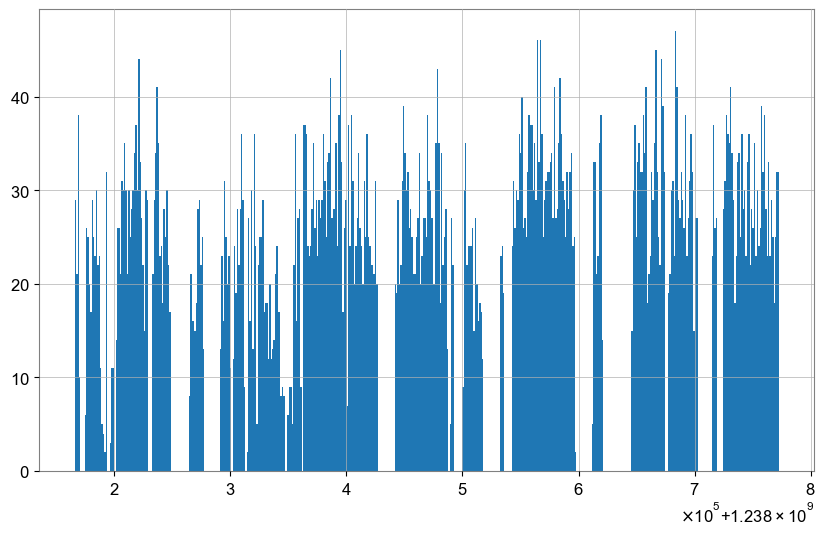

In [57]:
plt.figure(figsize=(10,6))
plt.hist(timeseries, bins = 500)

(array([1., 2., 0., ..., 0., 0., 1.]),
 array([1.23817553e+09, 1.23817556e+09, 1.23817559e+09, ...,
        1.23819217e+09, 1.23819220e+09, 1.23819224e+09]),
 <BarContainer object of 500 artists>)

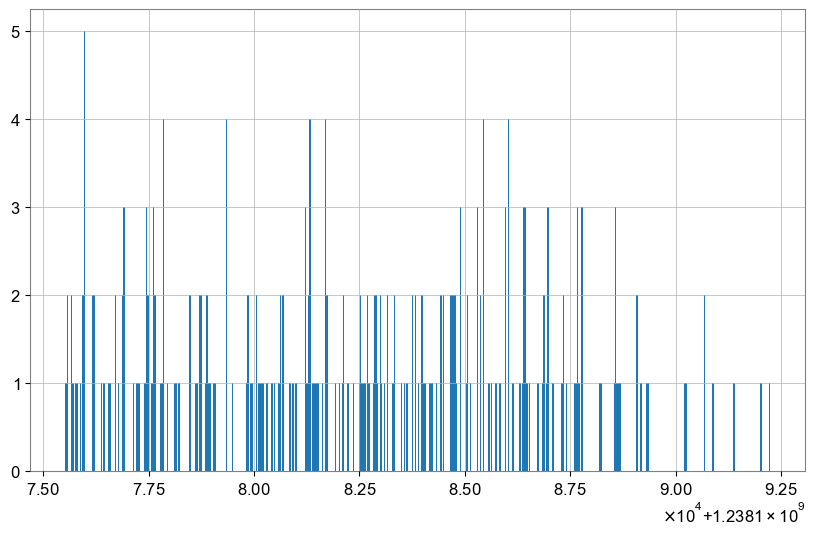

In [59]:
plt.figure(figsize=(10,6))
plt.hist(timeseries[np.argwhere(np.logical_and(timeseries > 1238175433,timeseries < 1238192569))], bins = 500)

In [61]:
np.argwhere(np.logical_and(timeseries > 1238205073,timeseries < 1238228885)).shape

(582, 1)

In [2]:
whitened_strain_list = np.zeros((0,12288))
starting_time = 1238392674
ending_time = 1238396770

for i in range(12):
    file = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_noise/L1_bg_dataset_p'+str(i+1)+'.hdf5'
    whitened_strain = np.array(h5py.File(file, 'r')['background_noise'])
    noise_time = np.array(h5py.File(file, 'r')['background_noise_t0'])
    
    assert len(whitened_strain) == len(noise_time)
    
    whitened_strain_list = np.append(whitened_strain_list, whitened_strain[np.argwhere(np.logical_and(noise_time > starting_time, noise_time < ending_time))])

In [3]:
whitened_strain_list = whitened_strain_list.reshape(-1, 12288)

In [4]:
whitened_strain_list.shape

(2886, 12288)

In [6]:
del whitened_strain_list

In [5]:
whitened_strain_list_cut = whitened_strain_list[:,:12000].reshape(2886*60,200)

In [7]:
whitened_strain_list

NameError: name 'whitened_strain_list' is not defined

In [8]:
whitened_strain_list_cut

array([[ 0.29203302, -0.21964495,  0.40414022, ...,
        -0.59547653, -0.10935267,  0.44210709],
       [-0.45568574, -0.07086434,  0.43809485, ...,
        -0.1757422 ,  0.52785169,  0.51791966],
       [ 0.80028764,  0.30943165, -0.25991682, ...,
        -0.27827722,  0.23209707, -0.06632896],
       ...,
       [-1.27495736, -0.785289  ,  0.41728033, ...,
        -0.14423015, -0.11837605, -0.32429914],
       [-0.54245019,  0.06617527,  0.10413435, ...,
        -0.37894572,  0.55293201,  0.4011587 ],
       [-0.79479196, -0.11710385,  0.32903429, ...,
        -0.19179833, -0.51654258,  0.51614828]])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00,
        3.3000e+01, 1.1000e+02, 3.5500e+02, 7.2800e+02,
        1.6080e+03, 3.1960e+03, 5.5910e+03, 8.7920e+03,
        1.2552e+04, 1.6029e+04, 1.8672e+04, 2.0058e+04,
        1.9670e+04, 1.7768e+04, 1.5018e+04, 1.1222e+04,
        8.2620e+03, 5.6500e+03, 3.5090e+03, 2.1040e+03,
        1.1570e+03, 5.8000e+02, 2.4900e+02, 1.3800e+02,
        5.6000e+01, 3.0000e+01, 1.5000e+01, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

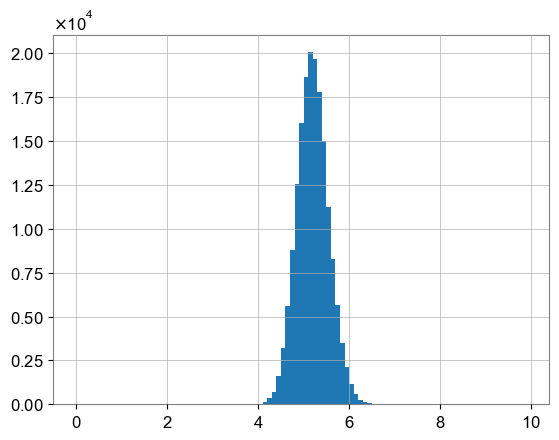

In [9]:
plt.hist(np.linalg.norm(whitened_strain_list_cut, axis = 1), bins = np.arange(0,10,0.1))

In [10]:
np.save('../Data_cached/real_bkg_173160_4096s_4000Hz_50ms.npy', whitened_strain_list_cut)

In [62]:
np.save('../Data_cached/real_bkg_2202000_63917s_4000Hz_50ms.npy', whitened_strain_list_cut)

In [11]:
del whitened_strain_list_cut

for H

In [12]:
whitened_strain_list = np.zeros((0,12288))
starting_time = 1238588525
ending_time = 1238592621

for i in range(12):
    file = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_noise/H1_bg_dataset_p'+str(i+1)+'.hdf5'
    whitened_strain = np.array(h5py.File(file, 'r')['background_noise'])
    noise_time = np.array(h5py.File(file, 'r')['background_noise_t0'])
    
    assert len(whitened_strain) == len(noise_time)
    
    whitened_strain_list = np.append(whitened_strain_list, whitened_strain[np.argwhere(np.logical_and(noise_time > starting_time, noise_time < ending_time))])

In [13]:
whitened_strain_list = whitened_strain_list.reshape(-1, 12288)

In [14]:
whitened_strain_list.shape

(1914, 12288)

In [15]:
whitened_strain_list_cut = whitened_strain_list[:,:12000].reshape(1914*60,200)

In [16]:
del whitened_strain_list

In [17]:
whitened_strain_list_cut

array([[ 0.41789542,  0.5111601 , -0.55211639, ...,
         0.36252948, -1.15720474, -0.19505499],
       [ 0.1688099 ,  0.18856572,  0.38479301, ...,
         1.62116442,  0.64026488, -0.75851965],
       [-0.84653204, -0.17480224, -0.17292998, ...,
        -0.08816205,  0.71870603, -0.18957712],
       ...,
       [ 0.7211711 ,  0.60287473,  0.3032169 , ...,
        -0.64629914, -1.11869563, -0.78774738],
       [ 0.17975416,  1.37309684,  1.09023994, ...,
         0.16677339, -0.9206198 , -0.45278487],
       [-0.75009986, -0.38588538,  0.47013321, ...,
        -0.76430761,  0.8898415 ,  0.91117653]])

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 4.000e+00,
        1.200e+01, 2.600e+01, 4.800e+01, 5.500e+01, 1.040e+02,
        1.990e+02, 2.820e+02, 3.400e+02, 4.850e+02, 6.650e+02,
        8.910e+02, 1.015e+03, 1.227e+03, 1.496e+03, 1.652e+03,
        1.956e+03, 2.225e+03, 2.322e+03, 2.554e+03, 2.874e+03,
        3.133e+03, 3.160e+03, 3.484e+03, 3.550e+03, 3.6

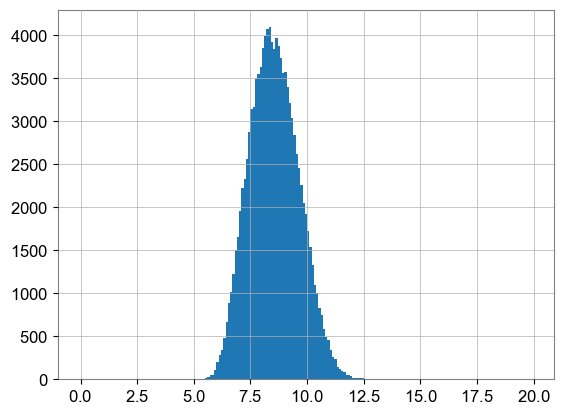

In [18]:
plt.hist(np.linalg.norm(whitened_strain_list_cut, axis = 1), bins = np.arange(0,20,0.1))

In [19]:
np.save('../Data_cached/real_bkg_H_114840_4096s_4000Hz_50ms.npy', whitened_strain_list_cut)

In [106]:
file_bkg_L1_p1_whitened_strain_data = file_bkg_L1_p1['background_noise']

In [83]:
file_bkg_L1_p1_whitened_strain_data = file_bkg_L1_p1['bg_noise']

In [74]:
file_path_bkg_H1_p1 = 'E://GWNMMAD_data/Tw_dataset/O3a_bgnoise_H1_p1.hdf5'
file_bkg_H1_p1 = h5py.File(file_path_bkg_H1_p1, 'r')
file_bkg_H1_p1_whitened_strain_data = file_bkg_H1_p1['bg_noise']

In [4]:
file_bkg_L1_p1_whitened_strain_data.shape

NameError: name 'file_bkg_L1_p1_whitened_strain_data' is not defined

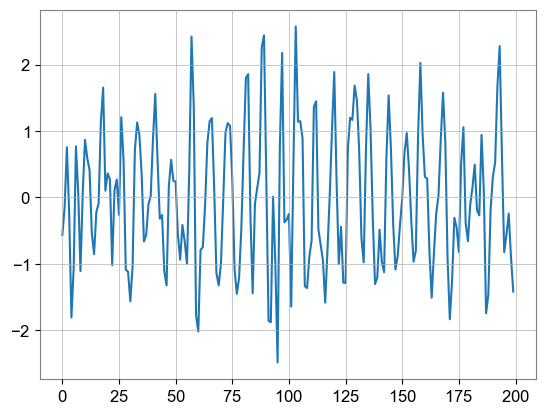

In [58]:
plt.plot(file_bkg_L1_p1_whitened_strain_data[0][0:200])

In [99]:
file_bkg_L1_p1_whitened_strain_data.shape

(9999, 24576)

In [125]:
starting_points = np.floor(np.random.random(1000000) * 12288).astype(int) + 6144

In [127]:
starting_points

array([    0,   200,   400,   600,   800,  1000,  1200,  1400,
        1600,  1800,  2000,  2200,  2400,  2600,  2800,  3000,
        3200,  3400,  3600,  3800,  4000,  4200,  4400,  4600,
        4800,  5000,  5200,  5400,  5600,  5800,  6000,  6200,
        6400,  6600,  6800,  7000,  7200,  7400,  7600,  7800,
        8000,  8200,  8400,  8600,  8800,  9000,  9200,  9400,
        9600,  9800, 10000, 10200, 10400, 10600, 10800, 11000,
       11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600,
       12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200,
       14400, 14600, 14800, 15000, 15200, 15400, 15600, 15800,
       16000, 16200, 16400, 16600, 16800, 17000, 17200, 17400,
       17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000,
       19200, 19400, 19600, 19800, 20000, 20200, 20400, 20600,
       20800, 21000, 21200, 21400, 21600, 21800, 22000, 22200,
       22400, 22600, 22800, 23000, 23200, 23400, 23600, 23800,
       24000, 24200, 24400])

In [126]:
len(starting_points)

123

In [135]:
bkg_selected = np.zeros((122 * 10,200))

for i in range(10):
    for j in range(122):
        bkg_selected[j + 122*i] = file_bkg_L1_p1_whitened_strain_data[i][starting_points[j]:starting_points[j]+200]

In [146]:
np.random.random_integers(0, 9915 * 122, 100000)

C:\Users\Liyang Miao\AppData\Local\Temp\ipykernel_18656\832329570.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1209630 + 1) instead
  np.random.random_integers(0, 9915 * 122, 100000)


array([ 105814,  175517,  677897, ..., 1043273,  585274,
         69201])

In [147]:
bkg_selected = np.zeros((100000,200))

for i in range(100000):
    bkg_selected[i] = file_bkg_L1_p1_whitened_strain_data[i//122][starting_points[i%122]:starting_points[i%122]+200]

In [151]:
bkg_selected.shape

(100000, 200)

In [44]:
bkg_selected = np.zeros((100000,2,200))

for i in range(100000):
    bkg_selected[i][0] = file_bkg_L1_p1_whitened_strain_data[i//1000][starting_points[i]:starting_points[i]+200]
    bkg_selected[i][1] = file_bkg_H1_p1_whitened_strain_data[i//1000][starting_points[i]:starting_points[i]+200]

In [87]:
np.linalg.norm(bkg_selected[:,0,:], axis = 1)

array([13.07269568, 11.29629009, 13.14336191, ...,  6.17485437,
        5.92513942,  5.62647492])

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 2.40000e+01,
        1.13000e+02, 4.09000e+02, 1.23900e+03, 2.71500e+03,
        5.80900e+03, 1.12550e+04, 2.03410e+04, 3.34730e+04,
        4.99820e+04, 6.64270e+04, 8.22550e+04, 9.44280e+04,
        1.00638e+05, 9.76890e+04, 8.96610e+04, 7.70820e+04,
        6.31590e+04, 4.99120e+04, 3.87620e+04, 2.91550e+04,
        2.13740e+04, 1.56230e+04, 1.12450e+04, 8.72800e+03,
        6.66500e+03, 5.13300e+03, 3.9640

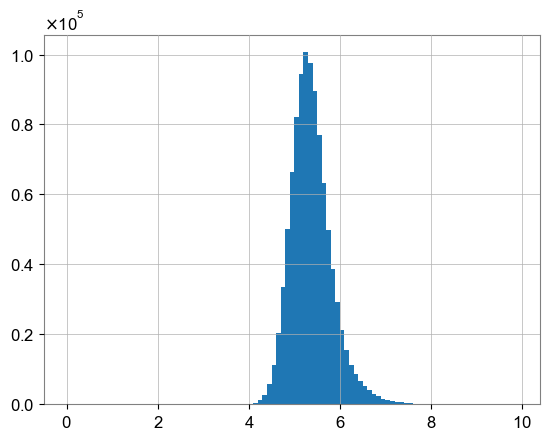

In [47]:
plt.hist(np.linalg.norm(bkg_selected[:,0,:], axis = 1), bins = np.arange(0, 10, 0.1))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        6.000e+00, 3.400e+01, 5.700e+01, 1.480e+02, 3.060e+02,
        5.250e+02, 9.230e+02, 1.462e+03, 2.049e+03, 2.612e+03,
        3.018e+03, 3.440e+03, 3.599e+03, 3.522e+03, 3.338e+03,
        2.994e+03, 2.626e+03, 2.255e+03, 1.840e+03, 1.565e+03,
        1.417e+03, 1.268e+03, 1.166e+03, 1.119e+03, 1.094e+03,
        1.073e+03, 9.920e+02, 1.055e+03, 1.068e+03, 1.076e+03,
        1.008e+03, 1.021e+03, 9.390e+02, 9.050e+02, 9.530e+02,
        1.026e+03, 9.880e+02, 9.810e+02, 1.053e+03, 1.1

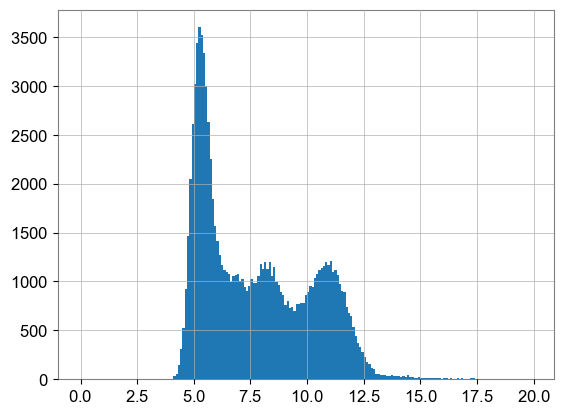

In [150]:
plt.hist(np.linalg.norm(bkg_selected, axis = 1), bins = np.arange(0,20,0.1))

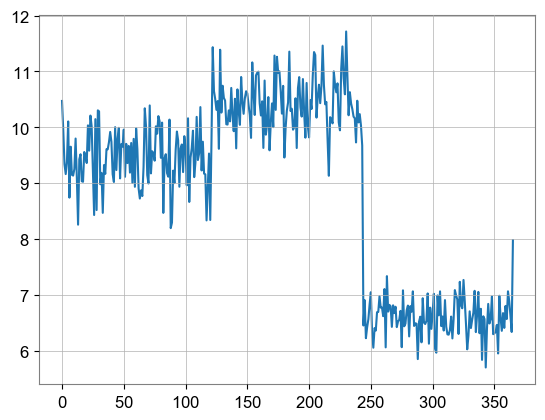

In [141]:
plt.plot(np.linalg.norm(bkg_selected[:122 * 3], axis = 1))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  2.,  5.,  2.,  8., 12., 18., 12.,
        16., 12.,  8.,  9., 10.,  1.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

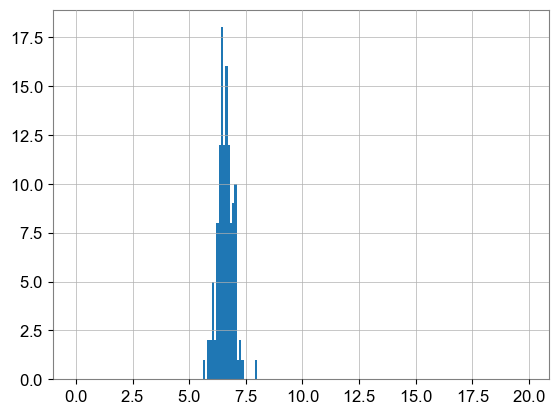

In [139]:
plt.hist(np.linalg.norm(bkg_selected[122 * 2:122 * 3], axis = 1), bins = np.arange(0, 20, 0.1))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  5.,  2.,  4.,
         4., 12.,  7., 12.,  8., 14.,  8.,  8., 10.,  4.,  7.,
         3.,  1.,  3.,  3.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

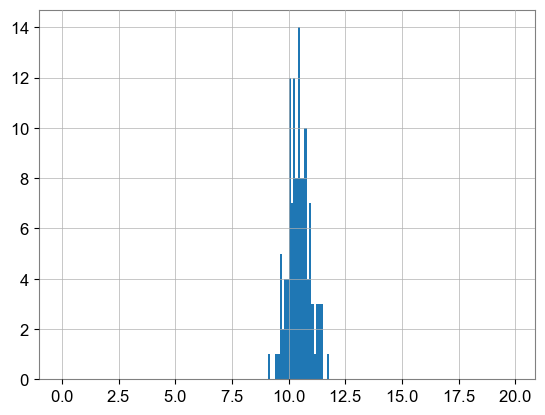

In [138]:
plt.hist(np.linalg.norm(bkg_selected[122:122 * 2], axis = 1), bins = np.arange(0, 20, 0.1))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  2.,  2.,  3.,  1.,  1.,  3.,
         1.,  8.,  5., 18.,  5.,  6.,  7.,  9., 11., 10.,  2.,
         7.,  6.,  7.,  2.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

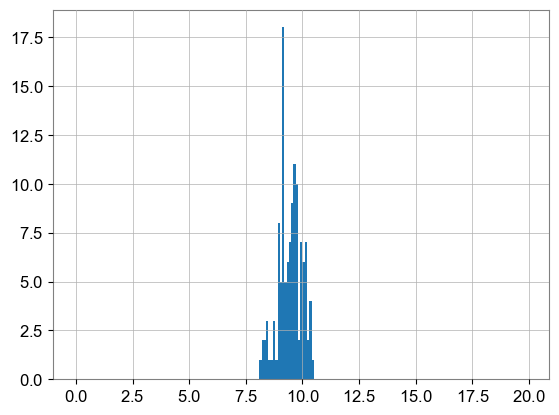

In [137]:
plt.hist(np.linalg.norm(bkg_selected[:122], axis = 1), bins = np.arange(0, 20, 0.1))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  20.,  24.,  72.,  80., 109., 149., 127.,
         93., 102.,  74.,  54.,  25.,  17.,  29.,  15.,   9.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        

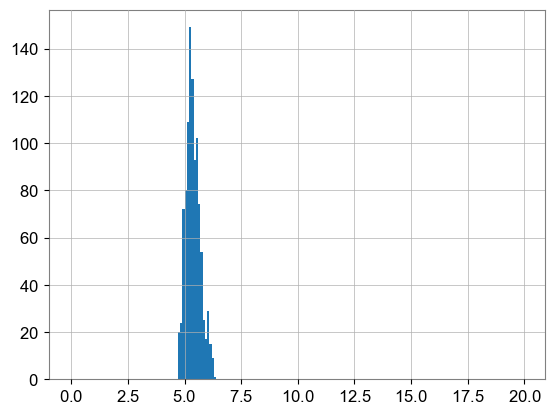

In [122]:
plt.hist(np.linalg.norm(bkg_selected, axis = 1), bins = np.arange(0, 20, 0.1))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  7.,  9., 11., 12., 21., 43., 61.,
        58., 76., 76., 86., 86., 82., 72., 92., 66., 45., 34.,
        28., 10., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

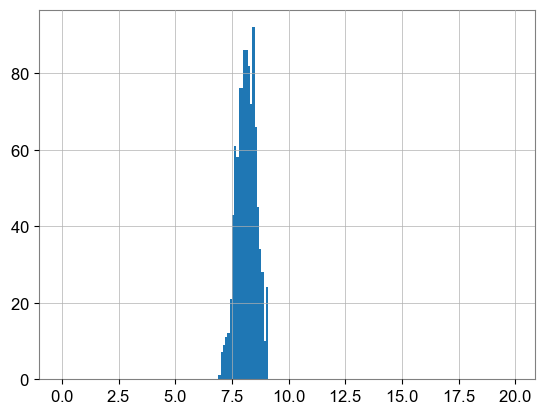

In [124]:
plt.hist(np.linalg.norm(bkg_selected, axis = 1), bins = np.arange(0, 20, 0.1))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 7.0000e+00, 2.4000e+01,
        7.1000e+01, 2.9400e+02, 7.0800e+02, 1.6560e+03,
        3.0780e+03, 5.8200e+03, 1.0076e+04, 1.5395e+04,
        2.2070e+04, 2.8962e+04, 3.4542e+04, 3.8045e+04,
        4.0615e+04, 3.9498e+04, 3.7220e+04, 3.2927e+04,
        2.8579e+04, 2.4739e+04, 2.1269e+04, 1.8495e+04,
        1.5850e+04, 1.3520e+04, 1.1777e+04, 1.0749e+04,
        1.0074e+04, 9.1740e+03, 8.4980e+03, 8.1990e+03,
        7.6180e+03, 7.5860e+03, 7.4390e+03, 7.56

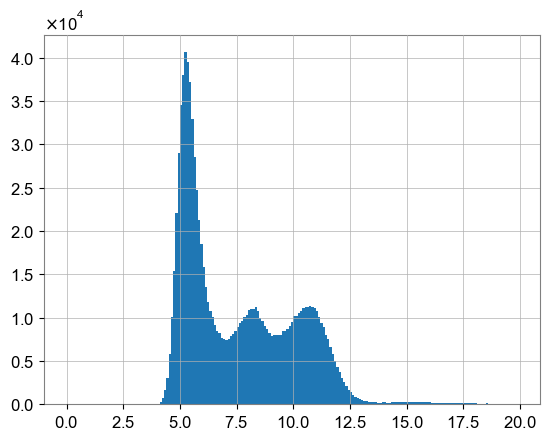

In [110]:
plt.hist(np.linalg.norm(bkg_selected, axis = 1), bins = np.arange(0, 20, 0.1))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 8.0000e+00, 3.2000e+01,
        1.0700e+02, 2.9800e+02, 6.5400e+02, 1.3930e+03,
        3.0070e+03, 5.5830e+03, 9.6120e+03, 1.4413e+04,
        2.0757e+04, 2.7026e+04, 3.1508e+04, 3.4608e+04,
        3.6094e+04, 3.5079e+04, 3.2709e+04, 2.9339e+04,
        2.6017e+04, 2.1824e+04, 1.8577e+04, 1.5767e+04,
        1.3988e+04, 1.2497e+04, 1.1379e+04, 1.1078e+04,
        1.0877e+04, 1.0539e+04, 1.0341e+04, 1.0130e+04,
        1.0394e+04, 9.8460e+03, 9.9180e+03, 9.50

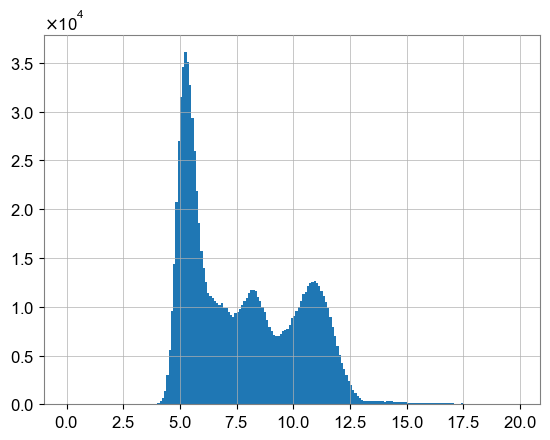

In [108]:
plt.hist(np.linalg.norm(bkg_selected, axis = 1), bins = np.arange(0, 20, 0.1))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.0000e+00, 3.2000e+01,
        1.1300e+02, 2.6200e+02, 6.8600e+02, 1.3580e+03,
        2.9590e+03, 5.5800e+03, 9.5030e+03, 1.4501e+04,
        2.0562e+04, 2.7010e+04, 3.1319e+04, 3.4989e+04,
        3.6070e+04, 3.5251e+04, 3.2927e+04, 2.9268e+04,
        2.5434e+04, 2.1864e+04, 1.8646e+04, 1.6044e+04,
        1.4255e+04, 1.2651e+04, 1.1621e+04, 1.0916e+04,
        1.0851e+04, 1.0437e+04, 1.0325e+04, 9.9950e+03,
        1.0028e+04, 1.0091e+04, 9.7230e+03, 9.58

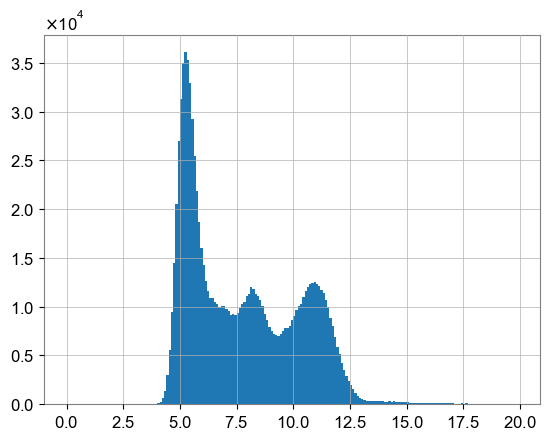

In [72]:
plt.hist(np.linalg.norm(bkg_selected, axis = 1), bins = np.arange(0, 20, 0.1))

In [152]:
np.save('../Data_cached/real_bkg_1e5_6000s_4000Hz_25ms_new_dataset_p1_full_random', bkg_selected)

In [31]:
np.load('../Data_cached/real_bkg_1e6_6000s_4000Hz_25ms_permutated.npz').keys()

KeysView(NpzFile '../Data_cached/real_bkg_1e6_6000s_4000Hz_25ms_permutated.npz' with keys: data_for_training_and_testing)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 2.40000e+01,
        1.25000e+02, 3.80000e+02, 1.13000e+03, 2.75500e+03,
        5.69200e+03, 1.14700e+04, 2.05450e+04, 3.32110e+04,
        5.01350e+04, 6.69950e+04, 8.24850e+04, 9.43900e+04,
        1.00121e+05, 9.76900e+04, 8.99390e+04, 7.68290e+04,
        6.31800e+04, 4.97120e+04, 3.83520e+04, 2.90850e+04,
        2.14140e+04, 1.55630e+04, 1.12770e+04, 8.75400e+03,
        6.71400e+03, 5.18300e+03, 4.0540

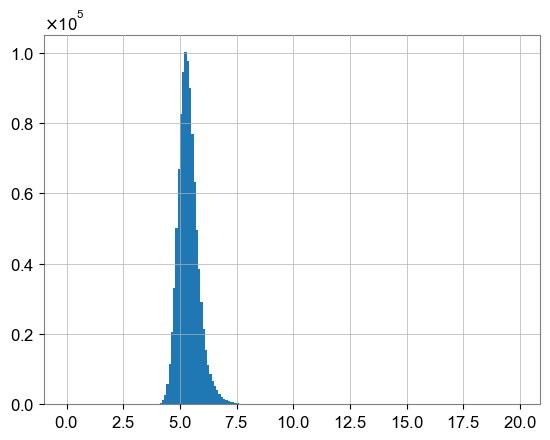

In [32]:
plt.hist(np.linalg.norm(np.load('../Data_cached/real_bkg_1e6_6000s_4000Hz_25ms_permutated.npz')['data_for_training_and_testing'], axis = 1), bins = np.arange(0, 20, 0.1))

In [6]:
file_path_BBH_L1_p1 = 'E://GWNMMAD_data/JIarui_dataset_1/dataset_inj_new/bbh_dataset_p1.hdf5'

In [7]:
file_BBH_L1_p1 = h5py.File(file_path_BBH_L1_p1, 'r')

In [8]:
file_BBH_L1_p1.keys()

<KeysViewHDF5 ['H1', 'L1', 'bbh_H1', 'bbh_L1', 'inj_params']>

In [9]:
snr_for_bbh_p1 = np.zeros(0)
for i in range(len(file_BBH_L1_p1['inj_params'])):
    snr_for_bbh_p1 = np.append(snr_for_bbh_p1,file_BBH_L1_p1['inj_params'][i][-1])

In [10]:
snr_for_bbh_p1

array([21.23498949, 15.537444  , 59.16623019, ..., 22.35644202,
       74.5956995 , 83.49397915])

In [87]:
snr_for_bbh_p1

array([21.23498949, 15.537444  , 59.16623019, ..., 22.35644202,
       74.5956995 , 83.49397915])

In [11]:
snr_for_bbh_p1.shape

(4505,)

In [13]:
bbh_with_indices_lt_8_st_384 = np.argwhere(np.logical_and(snr_for_bbh_p1 > 8,snr_for_bbh_p1 < 384))

In [14]:
bbh_with_indices_lt_8_st_384.shape

(3225, 1)

In [15]:
bbh_with_indices_lt_8_st_384

array([[   0],
       [   1],
       [   2],
       ...,
       [4502],
       [4503],
       [4504]], dtype=int64)

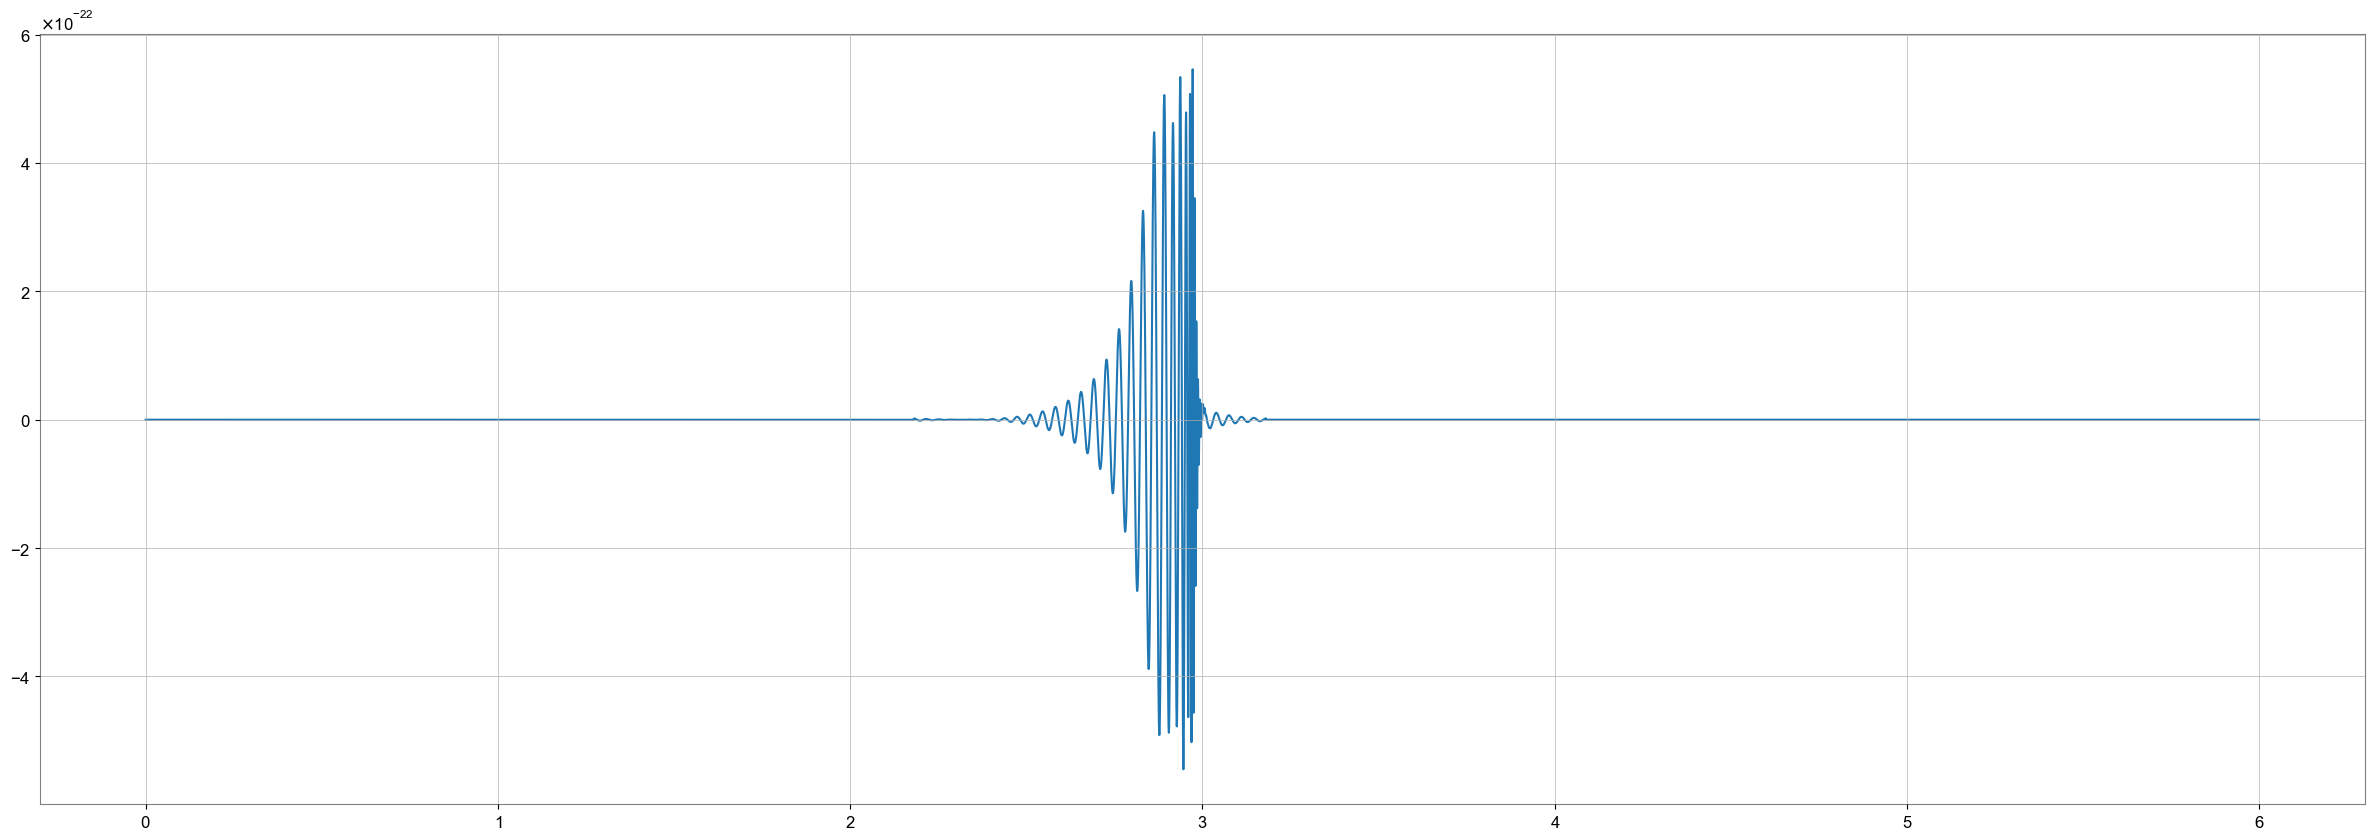

In [16]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(0,24576/4096, 1/4096),file_BBH_L1_p1['bbh_L1'][2])

In [28]:
np.array(file_BBH_L1_p1['bbh_L1'])[bbh_with_indices_lt_8_st_384].shape

(3225, 1, 24576)

In [29]:
bbh_merger_time_slice = np.argmax(np.array(file_BBH_L1_p1['bbh_L1'])[bbh_with_indices_lt_8_st_384].reshape(3225,-1), axis = 1)

In [39]:
bbh_merger_time_slice.shape

(3225,)

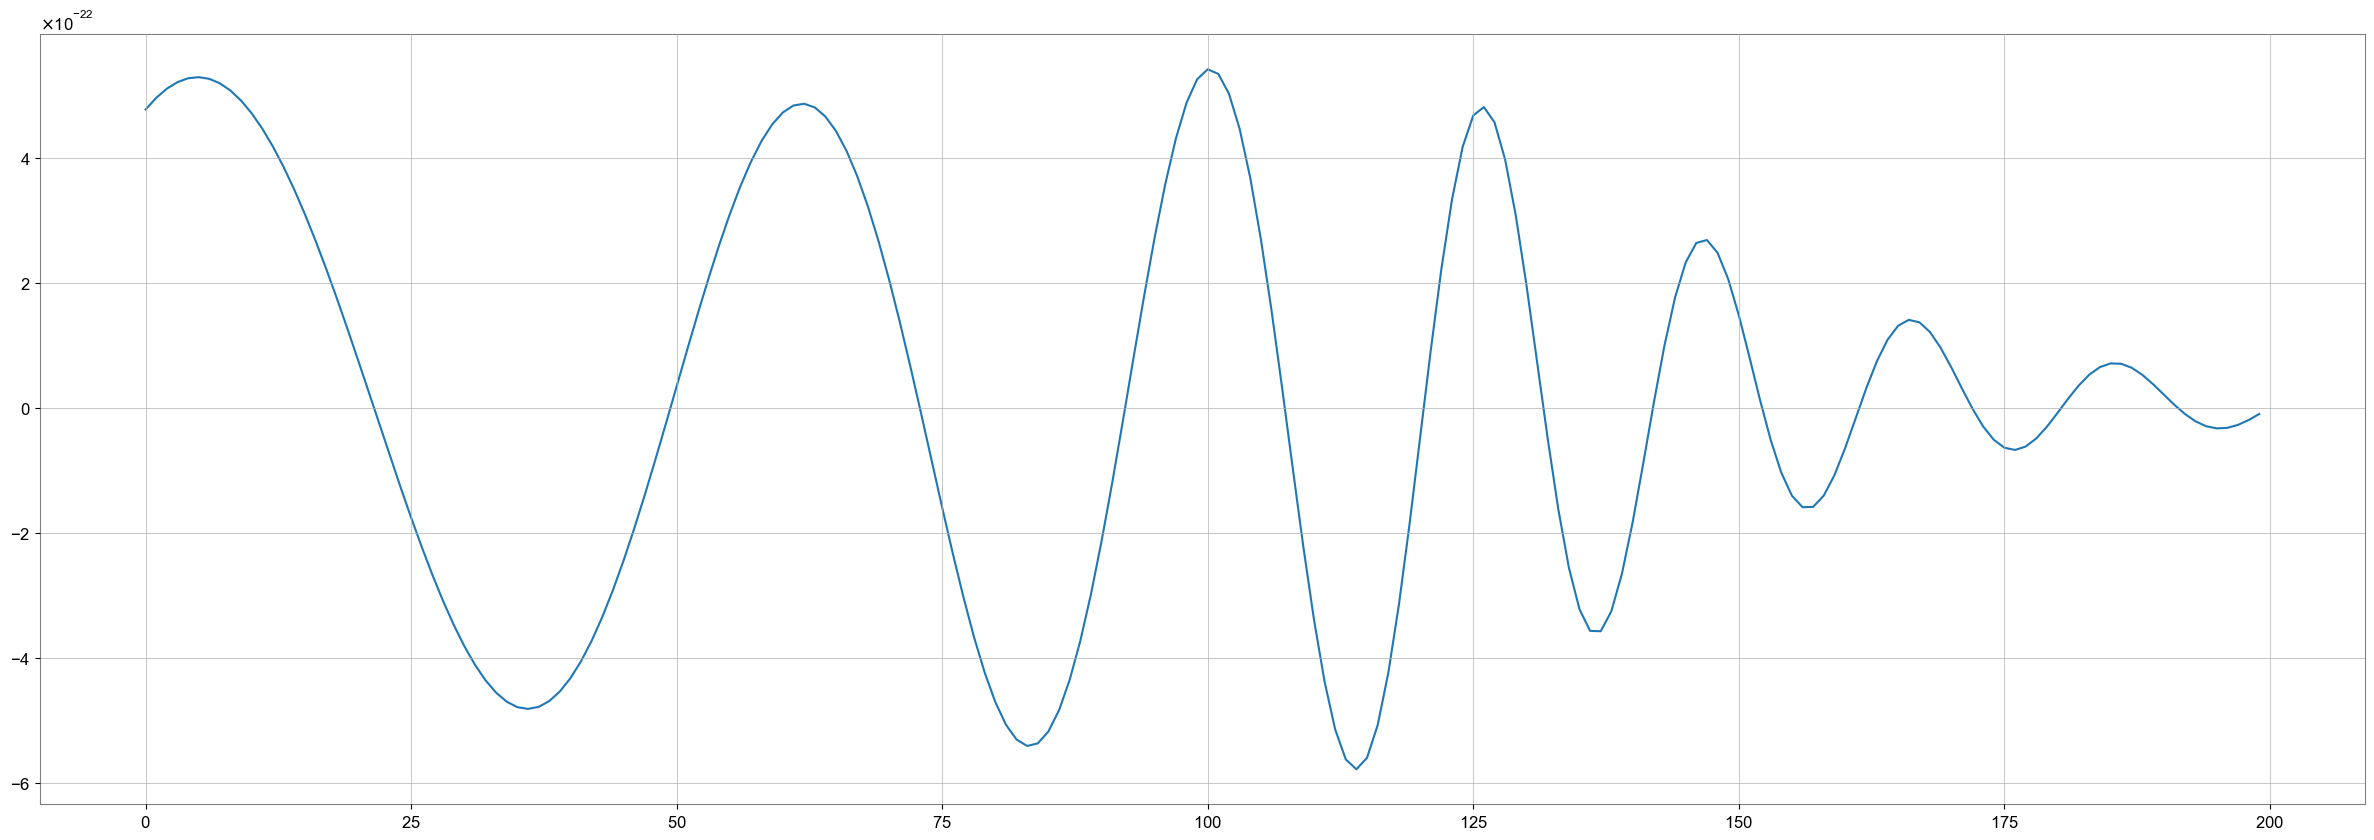

In [21]:
plt.figure(figsize=(30,10))
plt.plot(file_BBH_L1_p1['bbh_H1'][2][12174-100:12174+100])

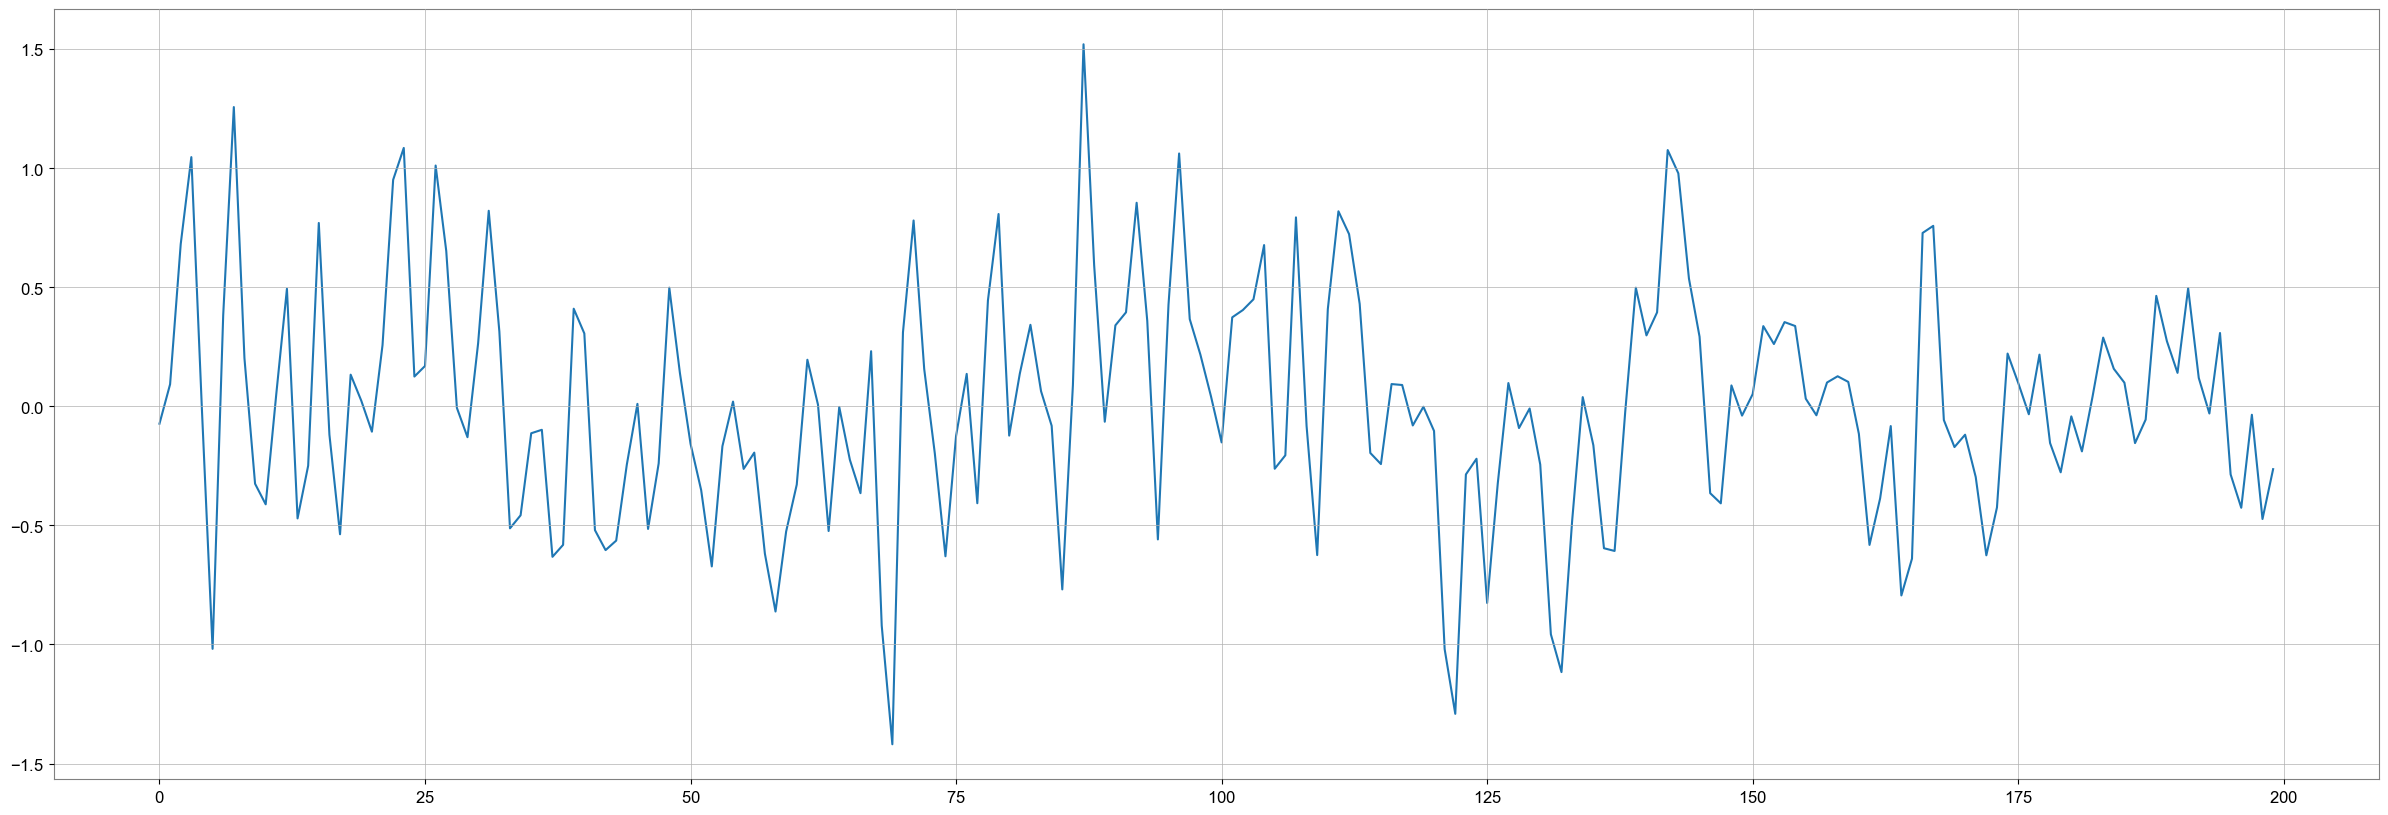

In [73]:
plt.figure(figsize=(30,10))
plt.plot(file_BBH_L1_p1['L1'][0][12188:12388])

In [96]:
file_BBH_L1_p1['L1']

AttributeError: 'Dataset' object has no attribute 'to_numpy'

In [31]:
num_of_bbh_samples = 3000

file_BBH_L1_p1_whitened_strain_data = np.array(file_BBH_L1_p1['L1'])[bbh_with_indices_lt_8_st_384].reshape(-1,24576)
bbh_injected_selected = np.zeros((num_of_bbh_samples,200))

for i in range(num_of_bbh_samples):
    bbh_injected_selected[i] = file_BBH_L1_p1_whitened_strain_data[i][bbh_merger_time_slice[i]-100:bbh_merger_time_slice[i]+100]

In [38]:
file_BBH_L1_p1_whitened_strain_data.shape

(3225, 24576)

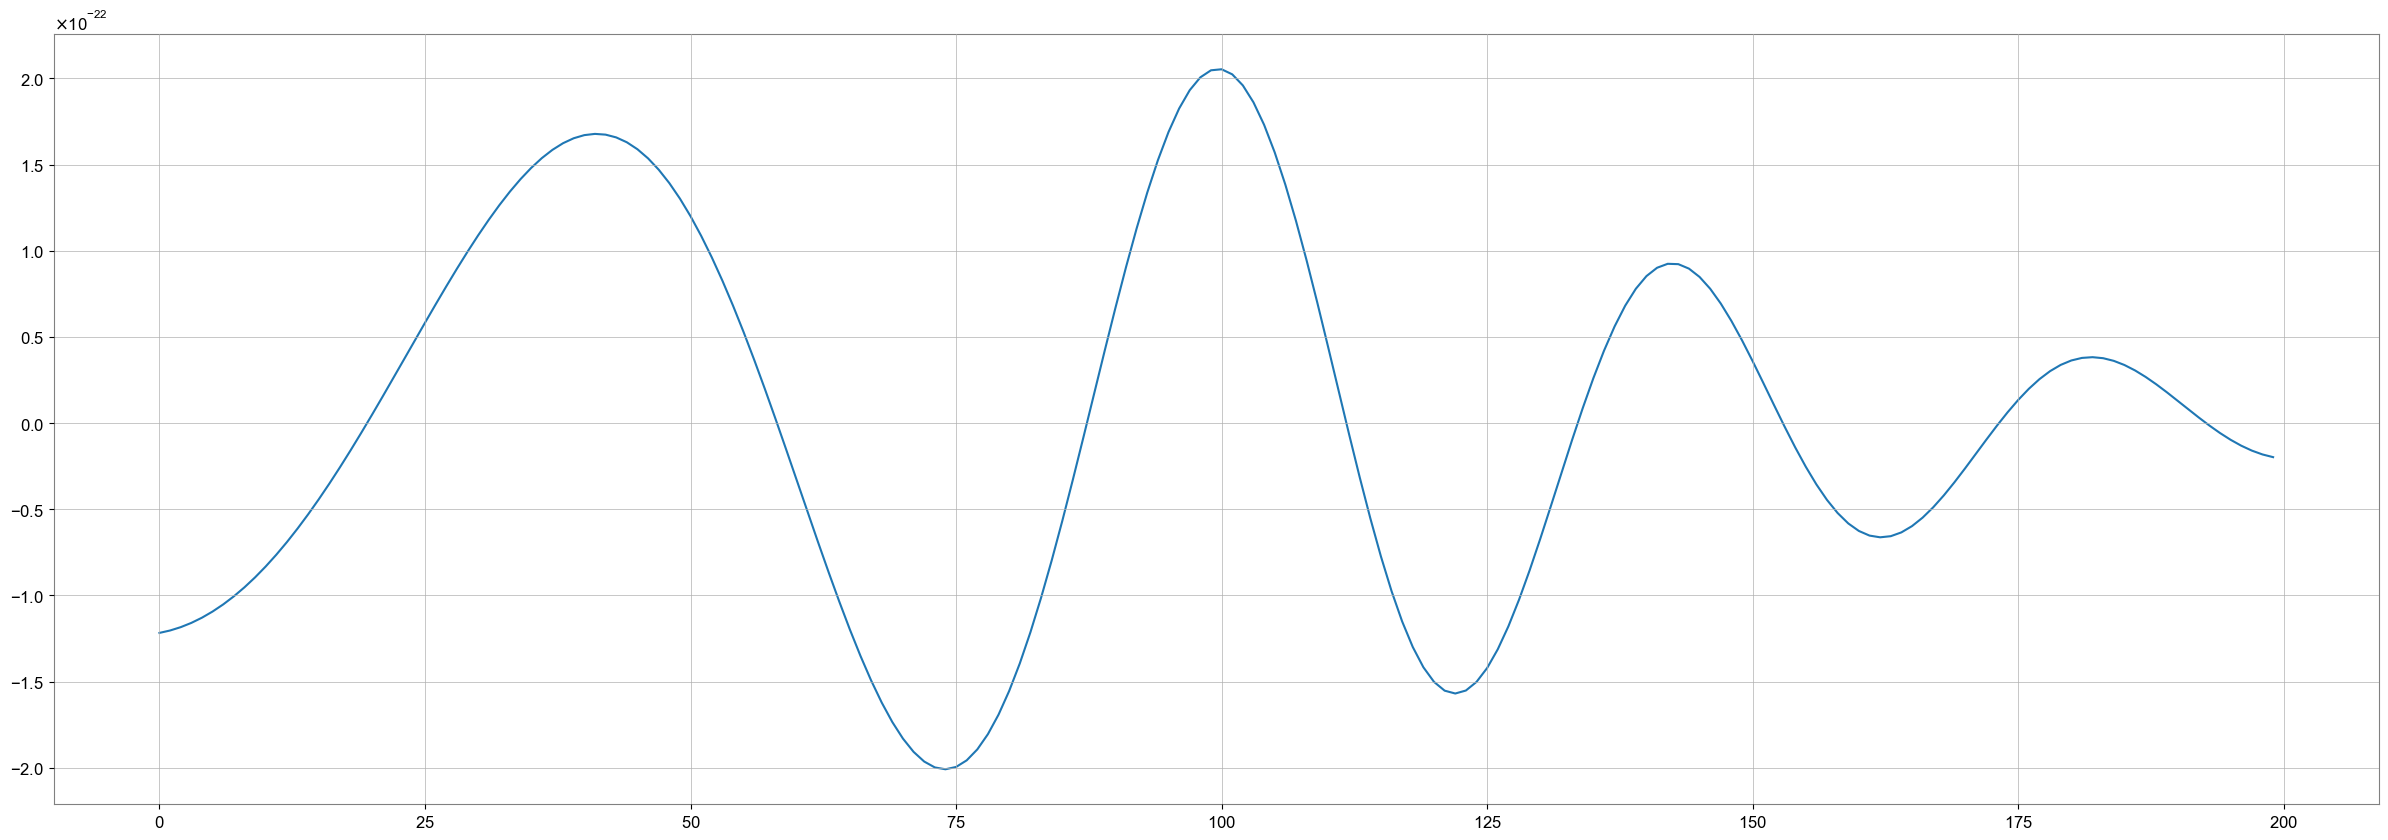

In [37]:
plt.figure(figsize=(30,10))
plt.plot((np.array(file_BBH_L1_p1['bbh_L1'])[bbh_with_indices_lt_8_st_384].reshape(-1,24576))[100][bbh_merger_time_slice[100]-100:bbh_merger_time_slice[100]+100])

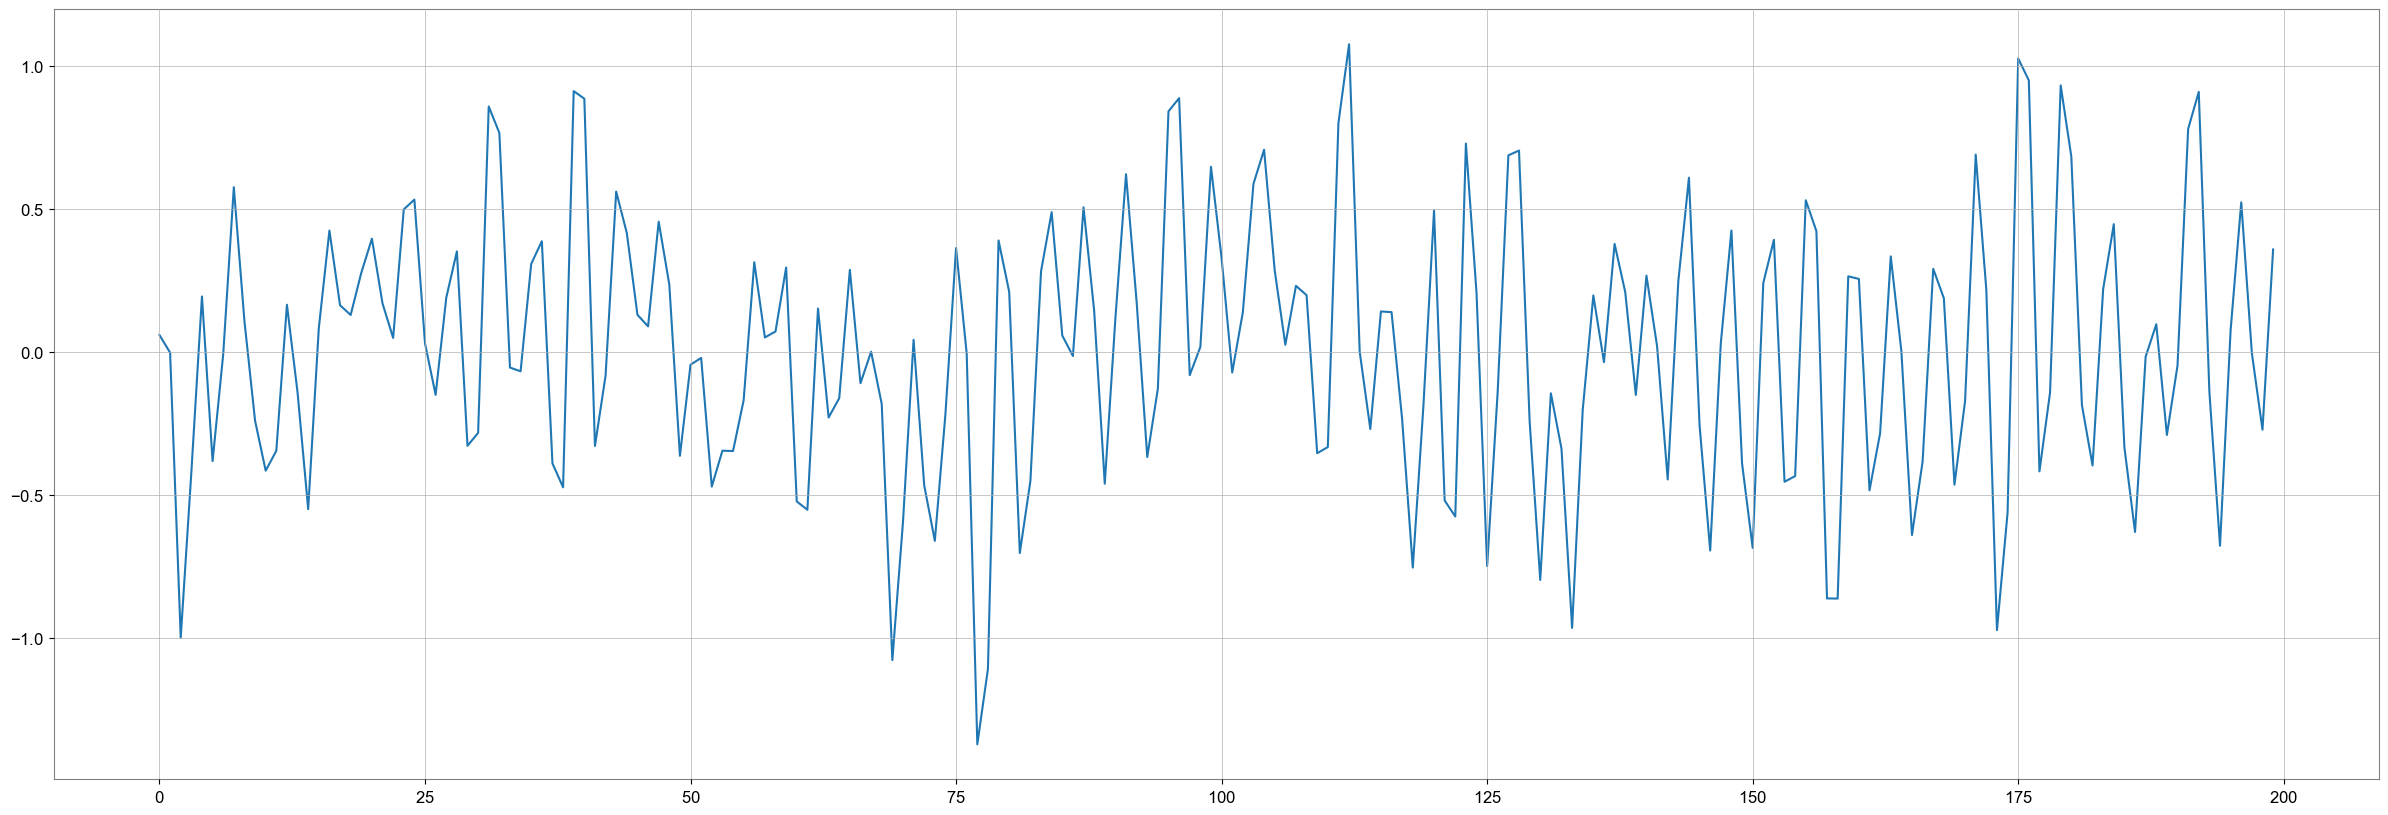

In [32]:
plt.figure(figsize=(30,10))
plt.plot(bbh_injected_selected[100])

In [101]:
file_BBH_L1_p1_whitened_strain_data.shape

(3225, 24576)

In [102]:
bbh_injected_selected = np.zeros((num_of_bbh_samples,200))

for i in range(num_of_bbh_samples):
    bbh_injected_selected[i] = file_BBH_L1_p1_whitened_strain_data[i][12188:12388]

IndexError: index 3000 is out of bounds for axis 0 with size 3000

In [40]:
np.save('../Data_cached/injected_BBH_3e3_snr8-384_around_merger_time.npy', bbh_injected_selected)

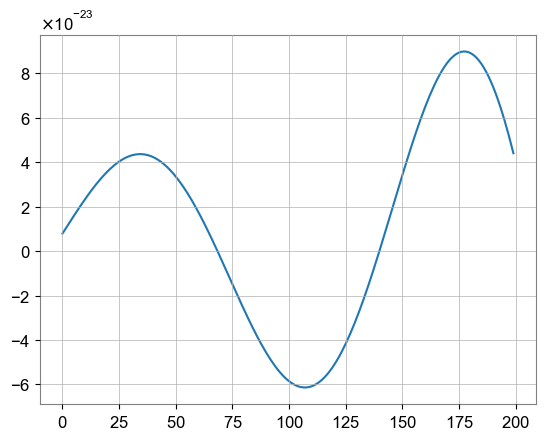

In [34]:
plt.plot(file_BBH_L1_p1['bbh_L1'][0][starting_points_bbh[0]:starting_points_bbh[0]+200])

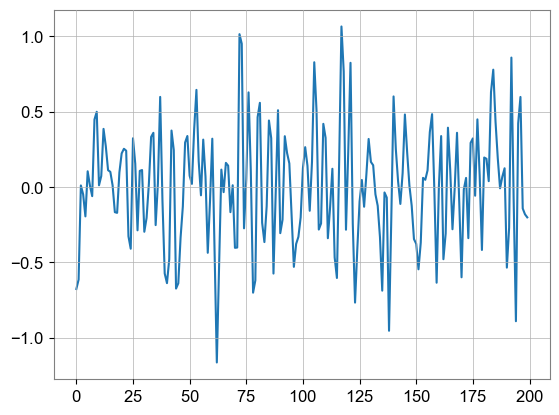

In [36]:
plt.plot(file_BBH_L1_p1['L1'][0][starting_points_bbh[0]:starting_points_bbh[0]+200])

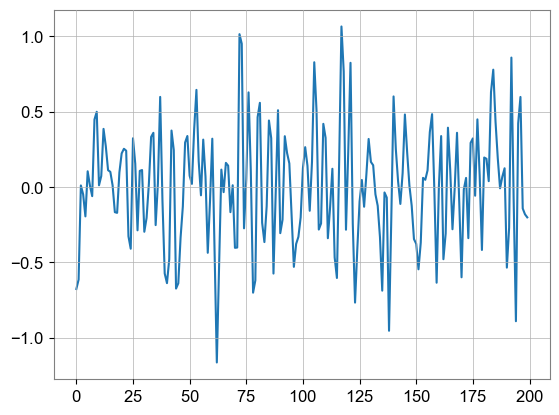

In [35]:
plt.plot(bbh_injected_selected[0])

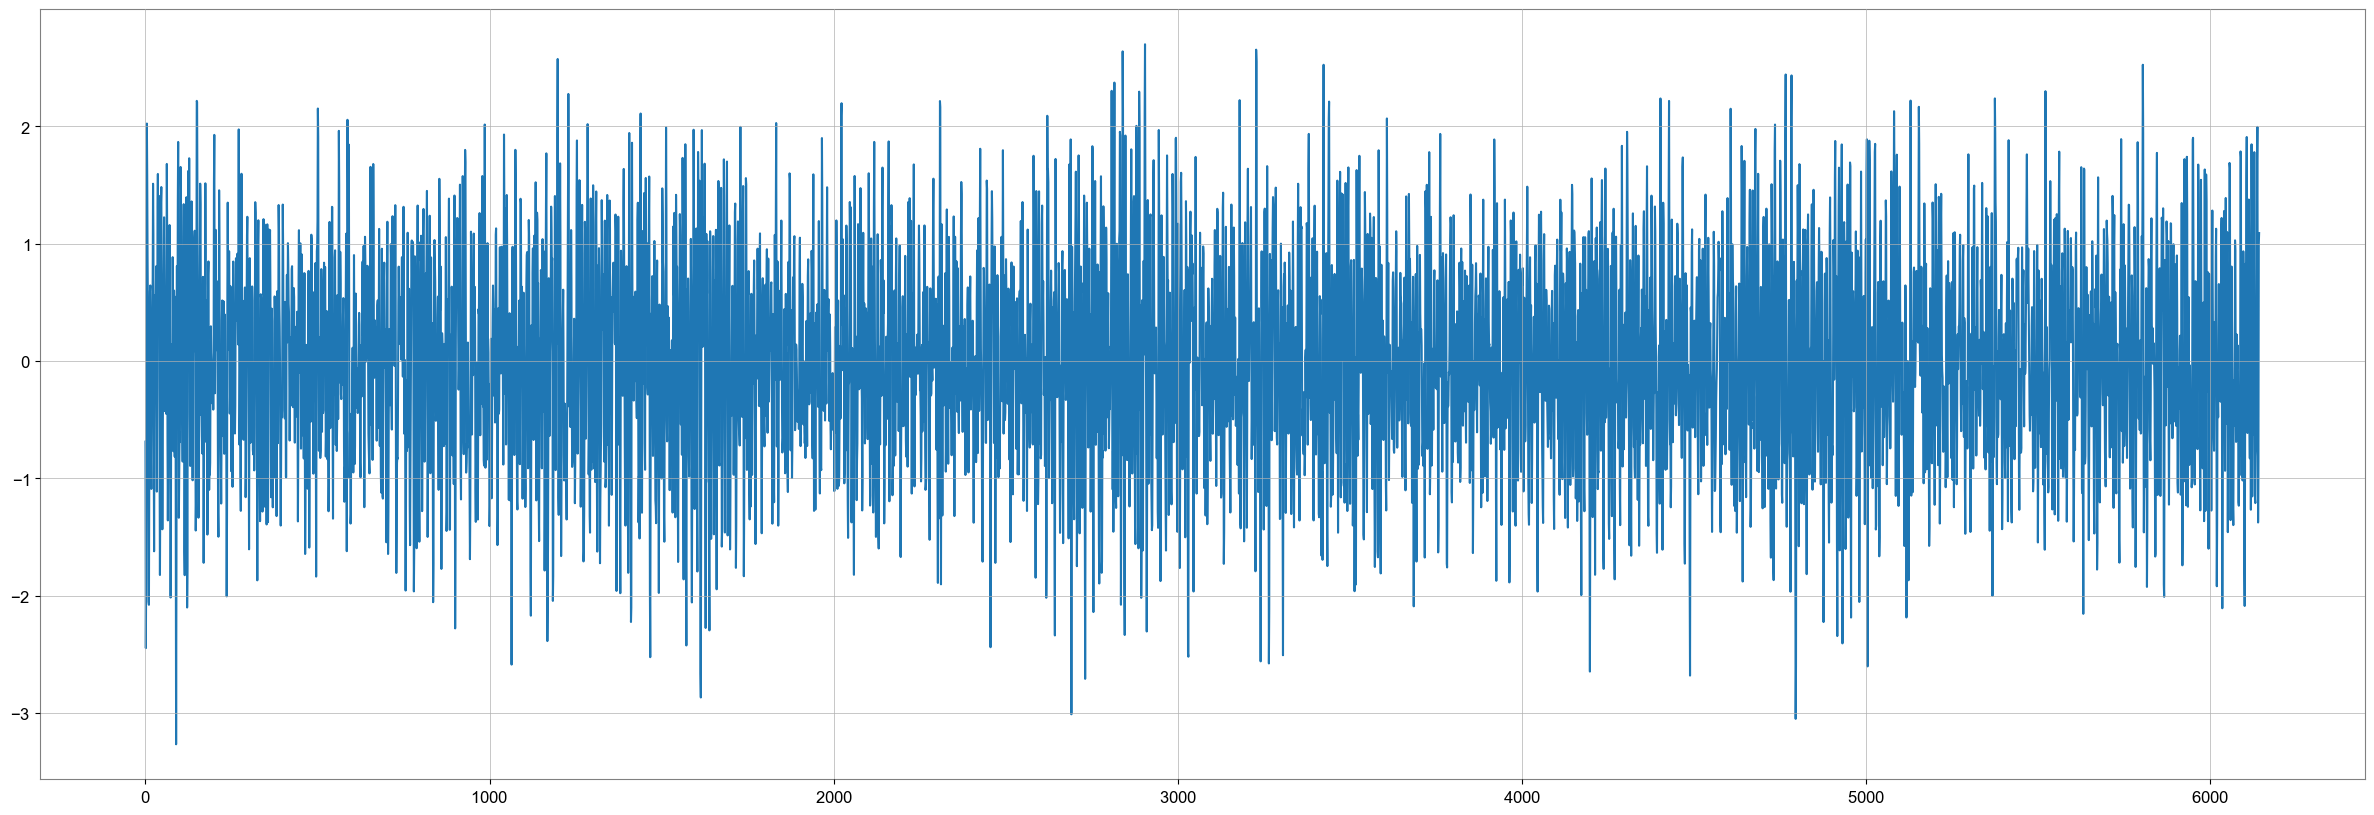

In [122]:
plt.figure(figsize=(30,10))
plt.plot(file_BBH_L1_p1['bbh_inject'][0][10240:16384])

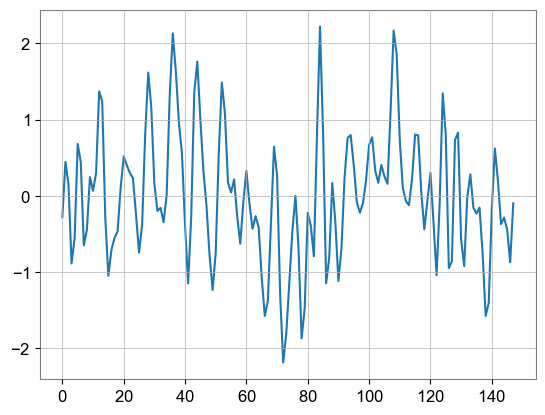

In [116]:
plt.plot(file_BBH_L1_p1['bbh_inject'][0][14336+950:16384-950])

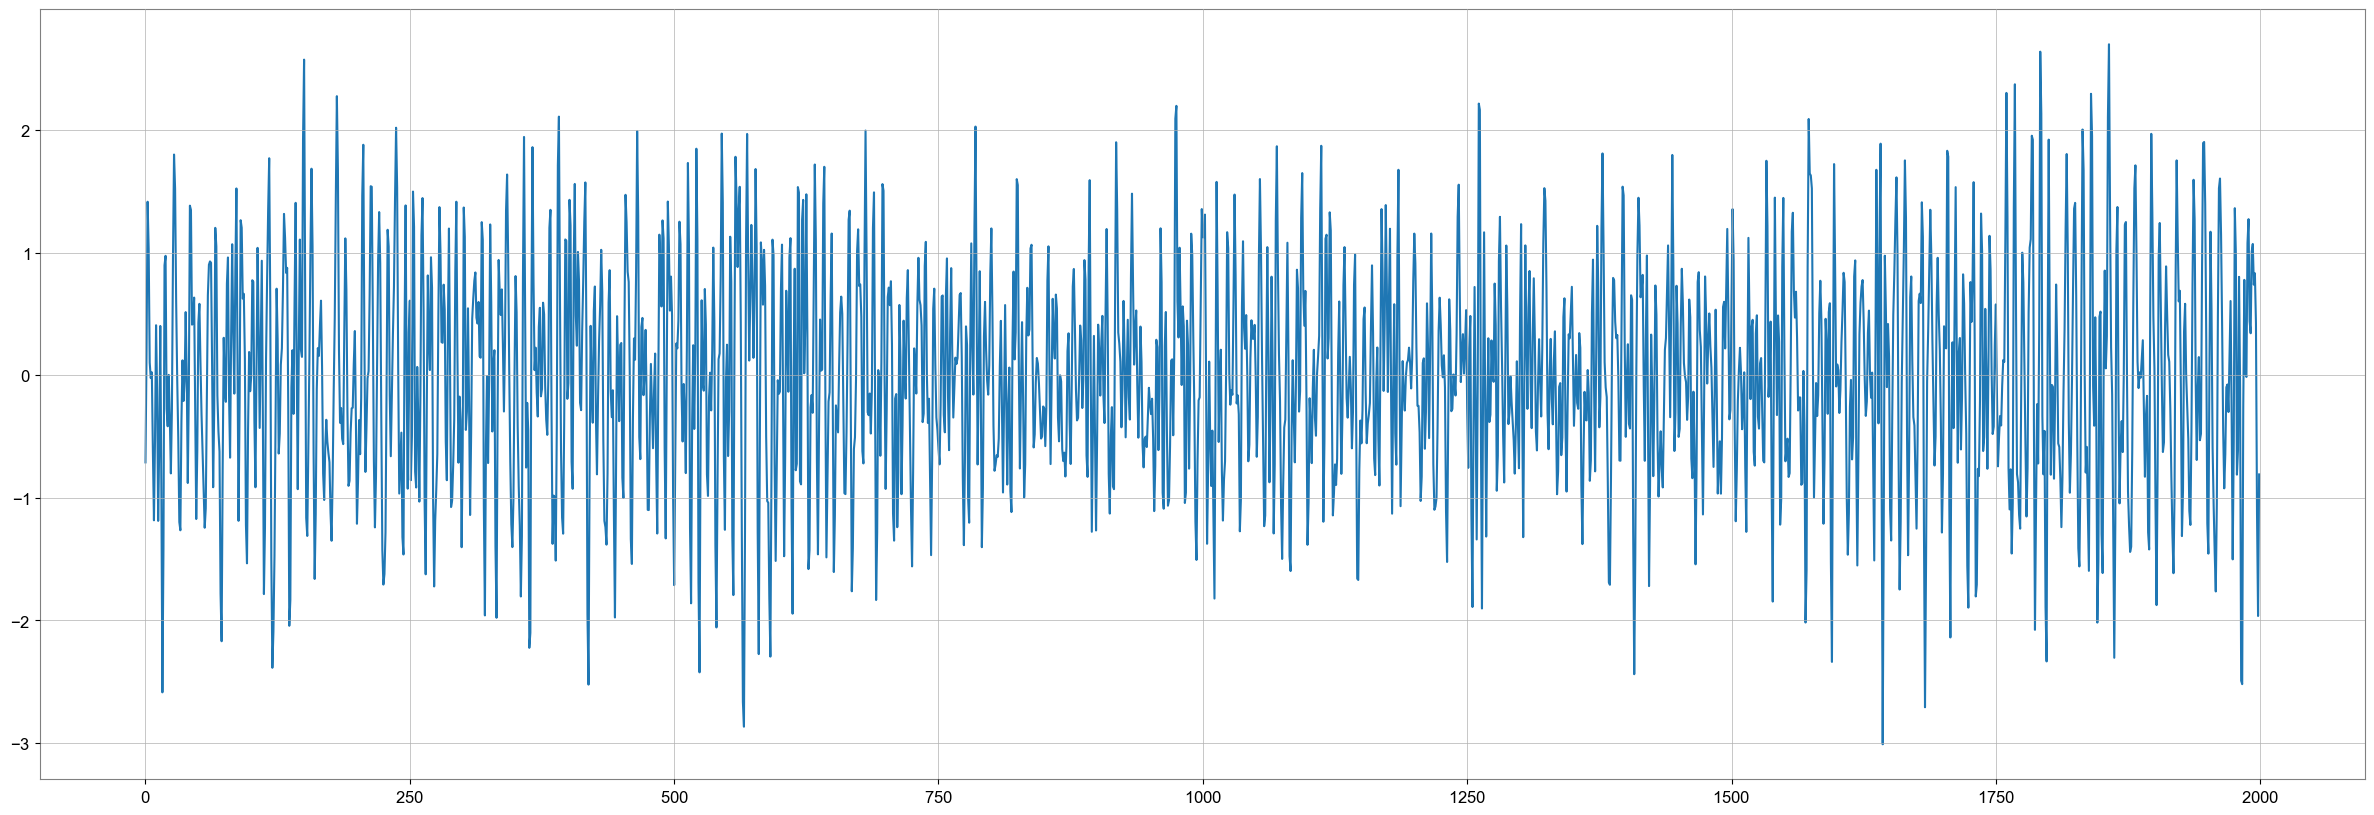

In [120]:
plt.figure(figsize=(30,10))
plt.plot(file_BBH_L1_p1['bbh_inject'][0][24576//2-1000:24576//2+1000])

In [135]:
file_BBH_L1_p1_whitened_strain_data = file_BBH_L1_p1['bbh_inject']

In [123]:
starting_points_bbh = np.floor((np.random.random(1000000)*6144)).astype(int) + 10240

In [143]:
bbh_injected_selected = np.zeros((1000000,200))

for i in range(1000000):
    bbh_injected_selected[i] = file_BBH_L1_p1_whitened_strain_data[i//1000][starting_points_bbh[i]:starting_points_bbh[i]+200]

In [145]:
np.save('../Data_cached/injected_BBH_1e6.npy', bbh_injected_selected)

In [146]:
del bbh_injected_selected

In [2]:
file_path_BBH_pure_L1_p1 = 'E://GWNMMAD_data/Tw_dataset/BBH_0.h5'
file_BBH_pure_L1_p1 = h5py.File(file_path_BBH_pure_L1_p1, 'r')

In [3]:
file_BBH_pure_L1_p1.keys()

<KeysViewHDF5 ['H1', 'K1', 'L1', 'V1', 'id']>

In [7]:
file_BBH_pure_L1_p1['L1'].shape

(5000, 6000)

In [4]:
file_BBH_pure_L1_p1['L1'][0]

array([-7.87646453e-23, -7.77192944e-23, -7.66541921e-23, ...,
       -4.55321988e-32, -2.96950669e-32,  0.00000000e+00])

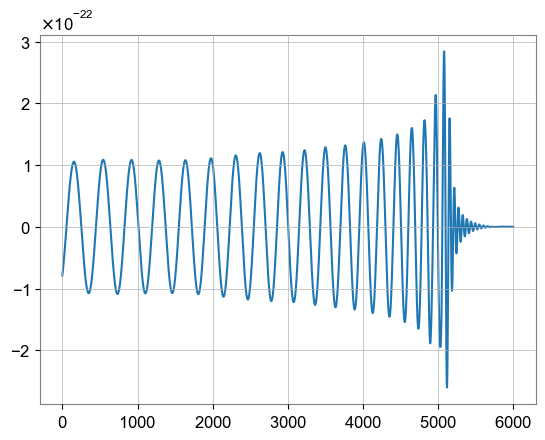

In [5]:
plt.plot(file_BBH_pure_L1_p1['L1'][0])

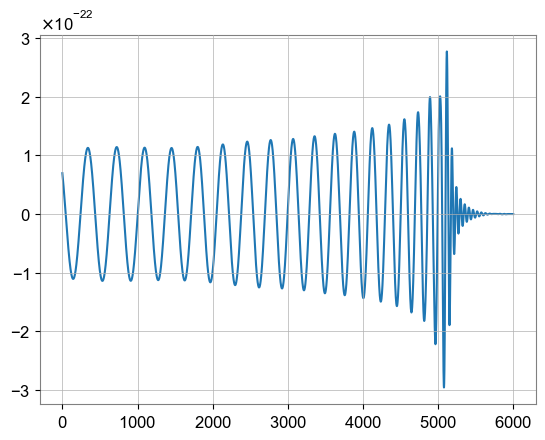

In [6]:
plt.plot(file_BBH_pure_L1_p1['H1'][0])

In [9]:
starting_points_pure_bbh = np.floor(np.random.random(1000000) * 5300).astype(int)

In [11]:
pure_bbh_selected = np.zeros((1000000,2,200))

for i in range(1000000):
    pure_bbh_selected[i][0] = file_BBH_pure_L1_p1['L1'][i//200][starting_points_pure_bbh[i]:starting_points_pure_bbh[i]+200]
    pure_bbh_selected[i][1] = file_BBH_pure_L1_p1['H1'][i//200][starting_points_pure_bbh[i]:starting_points_pure_bbh[i]+200]

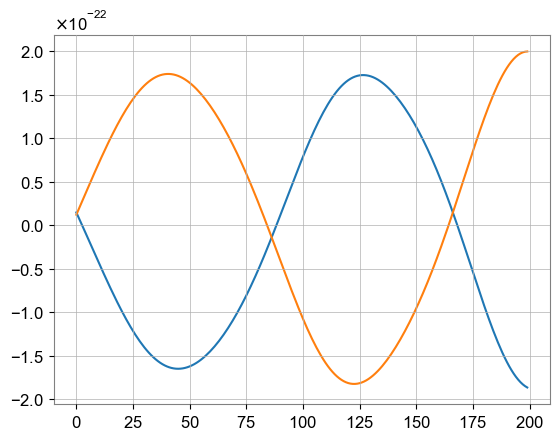

In [16]:
plt.plot(pure_bbh_selected[10][0])
plt.plot(pure_bbh_selected[10][1])

In [18]:
np.save('../Data_cached/pure_BBH_100_2det.npy', pure_bbh_selected)

### Investigate the glitch data to use

In [53]:
data_glitch_high_snr = np.zeros((0,200))
data_glitch_high_snr_snrlist = np.zeros(0)

threshold = 8

for i in range(1,7):
    data_glitch_and_snr = h5py.File('E:\GWNMMAD_data\JIarui_dataset_1\dataset_noise\L1_glitch_dataset_p'+str(i)+'.hdf5','r')
    # data_glitch_and_snr.keys()
    data_glitch = data_glitch_and_snr['glitch']
    data_snr = data_glitch_and_snr['glitch_info']
    count = 0
    for j in range(len(data_glitch)):
        if data_snr[j][1] > threshold:
            data_glitch_high_snr = np.append(data_glitch_high_snr, data_glitch[j][12278:12478])
            data_glitch_high_snr_snrlist = np.append(data_glitch_high_snr_snrlist, data_snr[j][1])
            count = count+1
    print('For part {}, totally {} glitches, and {} glitches with snr > {} captured'.format(i,len(data_glitch), count, threshold))



For part 1, totally 9942 glitches, and 995 glitches with snr > 8 captured
For part 2, totally 9888 glitches, and 986 glitches with snr > 8 captured
For part 3, totally 9998 glitches, and 756 glitches with snr > 8 captured
For part 4, totally 9971 glitches, and 867 glitches with snr > 8 captured
For part 5, totally 9986 glitches, and 384 glitches with snr > 8 captured
For part 6, totally 9947 glitches, and 524 glitches with snr > 8 captured


In [54]:
data_glitch_high_snr = data_glitch_high_snr.reshape(-1,200)

In [55]:
data_glitch_high_snr.shape

(4512, 200)

In [64]:
data_glitch_high_snr_snrlist.shape

(60132,)

In [56]:
np.savez('../Data_cached/real_glitches_H_snrlt8_4512_4000Hz_25ms.npz', strain_time_data = data_glitch_high_snr, snr_data = data_glitch_high_snr_snrlist)

In [64]:
data_glitch_and_snr = h5py.File('E:\GWNMMAD_data\JIarui_dataset_1\dataset_noise\L1_glitch_dataset_p'+str(6)+'.hdf5','r')
# data_glitch_and_snr.keys()
data_glitch = data_glitch_and_snr['glitch']
data_snr = data_glitch_and_snr['glitch_info']

In [63]:
data_glitch[0].dtype

dtype('float64')

In [65]:
data_glitch[0].dtype

dtype('float64')

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 6.000e+00,
        2.000e+01, 4.400e+01, 1.240e+02, 2.220e+02, 4.610e+02,
        7.370e+02, 1.147e+03, 1.607e+03, 1.907e+03, 2.389e+03,
        2.477e+03, 2.569e+03, 2.435e+03, 2.338e+03, 2.057e+03,
        1.764e+03, 1.578e+03, 1.420e+03, 1.292e+03, 1.181e+03,
        1.043e+03, 9.600e+02, 9.010e+02, 8.560e+02, 8.960e+02,
        8.450e+02, 8.170e+02, 8.340e+02, 8.510e+02, 9.100e+02,
        8.930e+02, 8.760e+02, 9.020e+02, 9.160e+02, 8.320e+02,
        8.450e+02, 8.260e+02, 7.550e+02, 6.710e+02, 6.380e+02,
        6.200e+02, 6.250e+02, 5.830e+02, 5.690e+02, 5.4

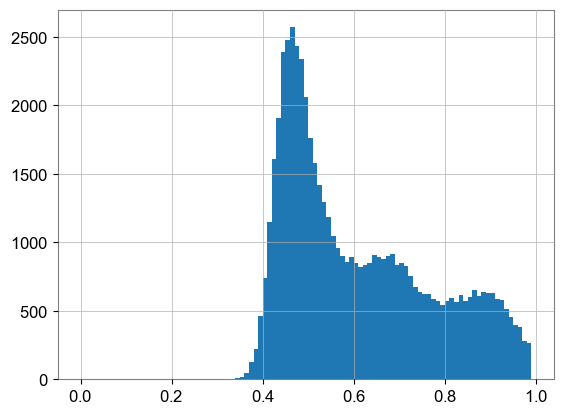

In [67]:
data_glitch_high_snr = data_glitch_high_snr/12.3

plt.hist(np.linalg.norm(data_glitch_high_snr, axis = 1), bins = np.arange(0,1,0.01))

In [68]:
data_snr[0]

(1.23826574e+09, 5.49596341, 18.92605287, 936.2911533)

In [35]:
data_glitch_and_snr.attrs.keys()

<KeysViewHDF5 []>

In [39]:
data_glitch = h5py.File('E://GWNMMAD_data/Tw_dataset/O3a_glitch_H1_p1.hdf5','r')

In [44]:
data_glitch

KeyError: "Unable to synchronously open attribute (can't locate attribute: 'glitch_info')"

In [40]:
data_glitch['glitch_info'][0][-5]

5.394957276646023

In [20]:
data_glitch['glitch_info'][1][3] - data_glitch['glitch_info'][1][2]

0.011719942092895508

In [4]:
data_glitch['glitch_info'].shape

(9998,)

In [28]:
snr_list = np.zeros((9998))

In [29]:
for i in range(9998):
    snr_list[i] = data_glitch['glitch_info'][i][-5]

In [30]:
np.argmax(snr_list)

3365

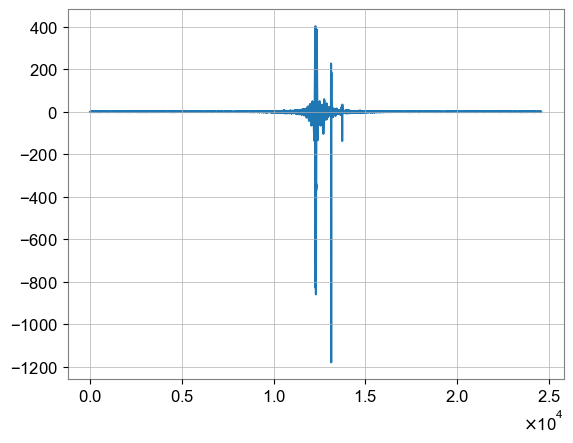

In [32]:
plt.plot(data_glitch['glitch'][3365])

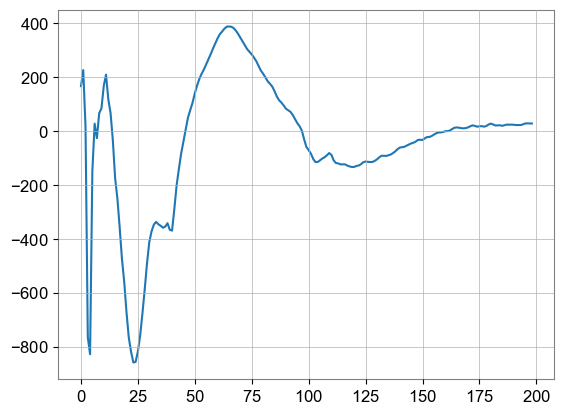

In [31]:
plt.plot(data_glitch['glitch'][3365][12278:12477])

In [33]:
slices = np.zeros((0,200))

for i in range(4096 * 6//200):
    slices = np.append(slices, data_glitch['glitch'][3365][i * 200: i * 200 + 200])

In [38]:
slices = slices.reshape(-1, 200)

In [45]:
slices.shape

(122, 200)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  3.,  3., 11.,  8., 14., 12.,
         9.,  5.,  7.,  2.,  3.,  4.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
        0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17,
        0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
        0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35,
        0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
        0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.6

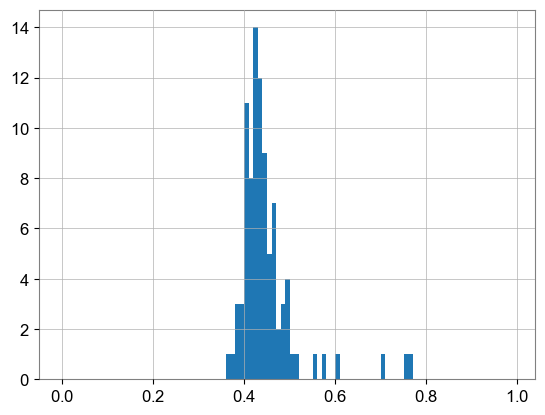

In [79]:
plt.hist(np.linalg.norm(slices/12.3, axis = 1), bins = np.arange(0,1,1/100))

Text(0.5, 1.0, 'Norm distribution')

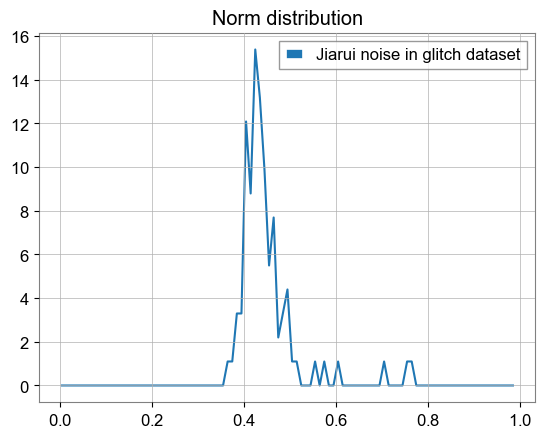

In [82]:
bin_scheme_norm = np.arange(0,1,0.01)

counts_noise_our, bin_position_noise_our = np.histogram(np.linalg.norm(slices/12.3, axis = 1), bins = bin_scheme_norm, density = True)
# counts_noise_tw, bin_position_noise_tw = np.histogram(np.linalg.norm(data_bbh, axis = 1), bins = bin_scheme_norm, density = True)
# counts_noise_bbh, bin_position_noise_bbh = np.histogram(np.linalg.norm(data_sg, axis = 1), bins = bin_scheme_norm, density = True)
# counts_noise_glitch, bin_position_noise_glitch = np.histogram(np.linalg.norm(data_glitch, axis = 1), bins = bin_scheme_norm, density = True)
# 
bin_centers_our = (bin_position_noise_our[:-1] + bin_position_noise_our[1:]) / 2
# bin_centers_tw = (bin_position_noise_tw[:-1] + bin_position_noise_tw[1:]) / 2
# bin_centers_bbh = (bin_position_noise_bbh[:-1] + bin_position_noise_bbh[1:]) / 2
# bin_centers_glitch = (bin_position_noise_glitch[:-1] + bin_position_noise_glitch[1:]) / 2


plt.plot(bin_centers_our, counts_noise_our, label = 'Jiarui noise in glitch dataset')
# plt.plot(bin_centers_tw, counts_noise_tw, label = 'GW BBH dataset')
# plt.plot(bin_centers_bbh, counts_noise_bbh, label = 'GWAK SG dataset')
# plt.plot(bin_centers_glitch, counts_noise_glitch, label = 'Jiarui glitch dataset')

plt.legend()
plt.title('Norm distribution')

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  3.,  3.,  6., 10.,  6., 13.,  9.,  6.,
         8.,  2.,  6.,  2.,  3.,  3.,  1.,  1.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ,
        1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1,
        2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
        4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
        5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 

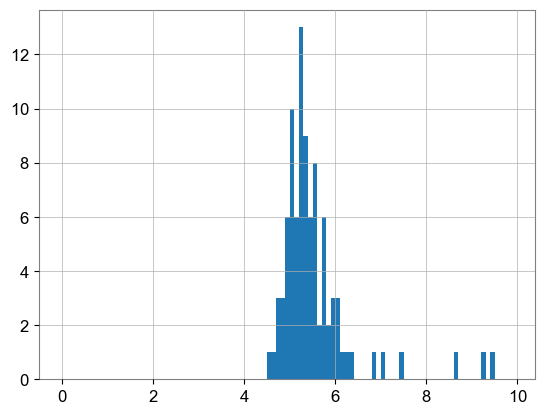

In [44]:
plt.hist(np.linalg.norm(slices, axis = 1), bins = np.arange(0,10,10/100))

In [75]:
5.53/0.45

12.28888888888889

In [76]:
(np.linalg.norm(slices, axis = 1))[np.argwhere(np.linalg.norm(slices, axis = 1)<10)].mean()

SyntaxError: invalid decimal literal (1809341808.py, line 1)

In [48]:
data_glitch['glitch'][:,12278:12478].shape

(9998, 200)

In [53]:
np.argwhere(snr_list > 8).shape

(1003, 1)

In [49]:
np.savez('../Data_cached/real_glitches_9998_4000Hz_25ms.npz', strain_time_data = data_glitch['glitch'][:,12278:12478], snr_data = snr_list)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  8., 10.,
         9., 20., 18., 24., 41., 37., 51., 31., 42., 37., 37.,
        32., 35., 36., 29., 23., 20., 21., 20., 15., 18.,  9.,
        15., 16., 11., 10.,  6., 11., 11.,  3.,  9., 13.,  8.,
         9.,  4.,  7.,  3.,  6.,  8.,  7.,  9.,  6., 11.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ,
        1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1,
        2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
        4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
        5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 

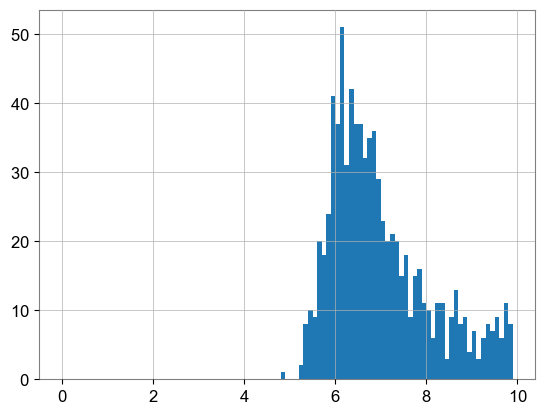

In [66]:
plt.hist(np.linalg.norm(data_glitch['glitch'][np.argwhere(snr_list > 8).reshape(-1),12278:12478], axis = 1), bins = np.arange(0,10,10/100))

In [65]:
np.argwhere(snr_list > 8).reshape(-1)

array([  63,   79,  102, ..., 9994, 9995, 9997], dtype=int64)